# Metric Aggregation

## Functions & Colors

In [1]:
source('jupyterFunctions.R')

In [2]:
input_dir <- '../../../input/20241219/'
output_dir <- '../../../output/20241219/'
all(file.exists(c(input_dir,output_dir)))

[1] TRUE

In [3]:
colors_vec <- readRDS('../addData/colors_vec.rds')

In [4]:
feature_shapes <- c('peak'=21,'cCRE'=22,'tile'=23,'basicGAS'=24,'archrGAS'=25)
feature_colors <- c('peak'='#F6A6B2','cCRE'='#F7C297','tile'='#FFDE85','basicGAS'='#B7DED2','archrGAS'='#90D2D8')
method_colors <- c('PCA'='#FFBC42','LSI'='#EC674E','rLSI'='#F63C80','rCCA'='#D81159','itLSI'='#8F2D56',
                   'SA2'='#2FB5C6','CS'='#A7B380','pVI'='#218380')
harmony_color <- 'grey40'
variable_type_colors <- c('Feature'='lightseagreen','Method'='mediumvioletred','Correction'='peru')
bio_color <- "#77006f"
batch_color <- "#527802"
ref_color <- "#7F7F7F"

In [5]:
ds_vec <- paste(sep='','dataset',1:5)
ft_vec <- c('peak','cCRE','tile','basicGAS','archrGAS')
md_vec <- c('PCA','LSI','rLSI','rCCA','itLSI','SA2','CS','pVI')
hm_vec <- c('noHarmony','Harmony')

In [6]:
ds_ref='dataset1'
ft_ref='tile'
md_ref='LSI'
hm_ref='noHarmony'

In [7]:
dataset_labeller <- paste('Dataset',1:5)
names(dataset_labeller) <- paste(sep='','dataset',1:5)

In [62]:
save_dir <- NA #'../output3/' #or NA if don't want to save
file_extension <- '.pdf'

## Data Extraction

* This step takes roughly 10 minutes.
* NOTE: mKNN was renamed in the text to be bioKNN and lsKLD was renamed to be batchKLD

In [9]:
perCell_metrics_df <- getUMAP_fromFile(input_dir,output_dir,ds_vec,ft_vec,md_vec,hm_vec,
                                       c('ATAC_PH200_mKNN','ATAC_PH200_lsKLD',
                                         'ATAC_ST200_mKNN','ATAC_ST200_lsKLD',
                                         'ATAC_cLISI','ATAC_iLISI'))
head(perCell_metrics_df,n=3)

UMAP1     UMAP2    cell                      dataset  feature method Harmony
1 -5.769495 7.423580 BRI-1281_AAACAGCCAATTTGGT dataset1 peak    PCA    FALSE  
2 -8.165159 3.775785 BRI-1281_AAACAGCCAGCACCAT dataset1 peak    PCA    FALSE  
3  4.838375 7.438617 BRI-1281_AAACATGCAGGCTAGA dataset1 peak    PCA    FALSE  
  ATAC_cLISI ATAC_iLISI ATAC_PH200_mKNN ATAC_PH200_lsKLD ATAC_ST200_mKNN
1 1          2.708429   14              0.5790366        11             
2 1          1.139588   23              0.5718257        12             
3 1          1.088302    8              1.6794864        26             
  ATAC_ST200_lsKLD
1 0.7804342       
2 0.9602827       
3 1.1136888

In [10]:
perCell_metrics_df$ATAC_PH200_mKNN_missPerc <- missPerc_funct(perCell_metrics_df$ATAC_PH200_mKNN)
perCell_metrics_df$ATAC_ST200_mKNN_missPerc <- missPerc_funct(perCell_metrics_df$ATAC_ST200_mKNN)

In [11]:
if(!is.na(save_dir)){
    saveRDS(perCell_metrics_df,file=paste(sep='',save_dir,'all_perCell_metrics.rds'))
}

In [12]:
Harmony_perCell_metrics_df <- perCell_metrics_df[which(perCell_metrics_df$Harmony==TRUE),]
rownames(Harmony_perCell_metrics_df) <- NULL
noHarmony_perCell_metrics_df <- perCell_metrics_df[which(perCell_metrics_df$Harmony==FALSE),]
rownames(noHarmony_perCell_metrics_df) <- NULL
identical(Harmony_perCell_metrics_df[,3:6],noHarmony_perCell_metrics_df[,3:6])

[1] TRUE

## NN metrics - RNA-embedding1

In [58]:
title_str <- 'NN metrics - RNA-embedding1'
bio_str <- 'bioKNN'
batch_str <- 'batchKLD'
file_str <- 'PH200'

### Mean Scatterplots

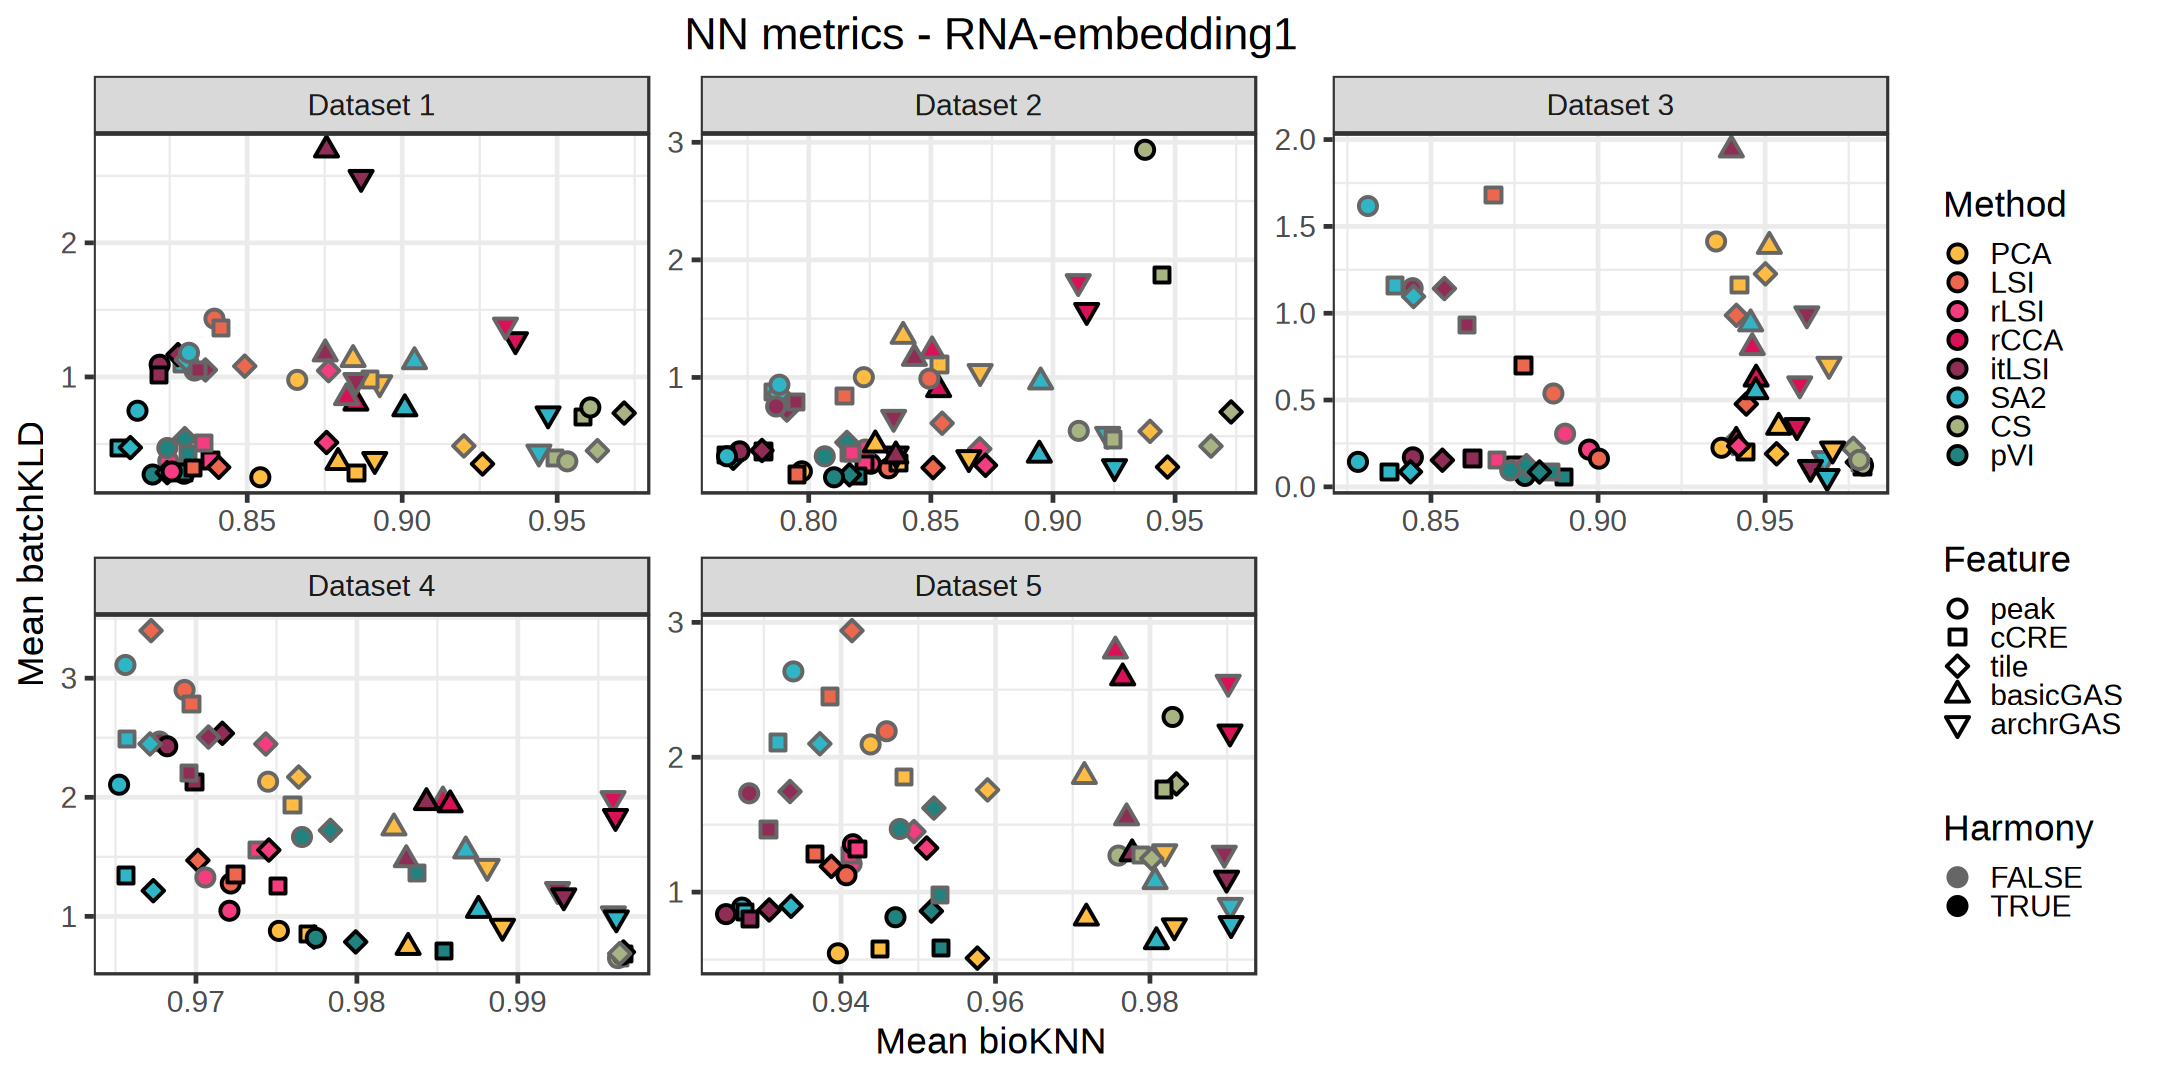

In [14]:
PH200_summary_df <- makeCompDF_wNA_woTR(perCell_metrics_df,'ATAC_PH200_lsKLD','ATAC_PH200_mKNN_missPerc',
                                        c('dataset','method','feature','Harmony'))

PH200_summary_df$dataset <- factor(PH200_summary_df$dataset,levels=ds_vec)
PH200_summary_df$feature <- factor(PH200_summary_df$feature,levels=ft_vec)
PH200_summary_df$method <- factor(PH200_summary_df$method,levels=md_vec)

options(repr.plot.height=9,repr.plot.width=18)
set.seed(0)
g <- ggplot(PH200_summary_df[sample(nrow(PH200_summary_df),nrow(PH200_summary_df)),],
            aes(x=CT_mean,y=sample_mean,fill=method,shape=feature,color=Harmony)) + 
        geom_point(size=4,stroke=1.25) + 
        theme_bw(base_size=22) + 
        labs(x=paste('Mean',bio_str),y=paste('Mean',batch_str),shape='Feature',fill='Method',title=title_str) +
        theme(plot.title=element_text(hjust = 0.5)) +
        scale_fill_manual(values=method_colors) + scale_shape_manual(values=feature_shapes) + 
        scale_color_manual(values=c('TRUE'='black','FALSE'=harmony_color)) + 
        guides(fill = guide_legend(override.aes = list(shape=21))) +
        facet_wrap(~dataset,scales = "free",labeller = labeller(dataset=dataset_labeller))
print(g)

if(!is.na(save_dir)){
    ggsave(file=paste(sep='',save_dir,file_str,'_mean_facetDataset_scatterPlot',file_extension),
           plot=g,units='in',height=9,width=18,dpi=300)
}

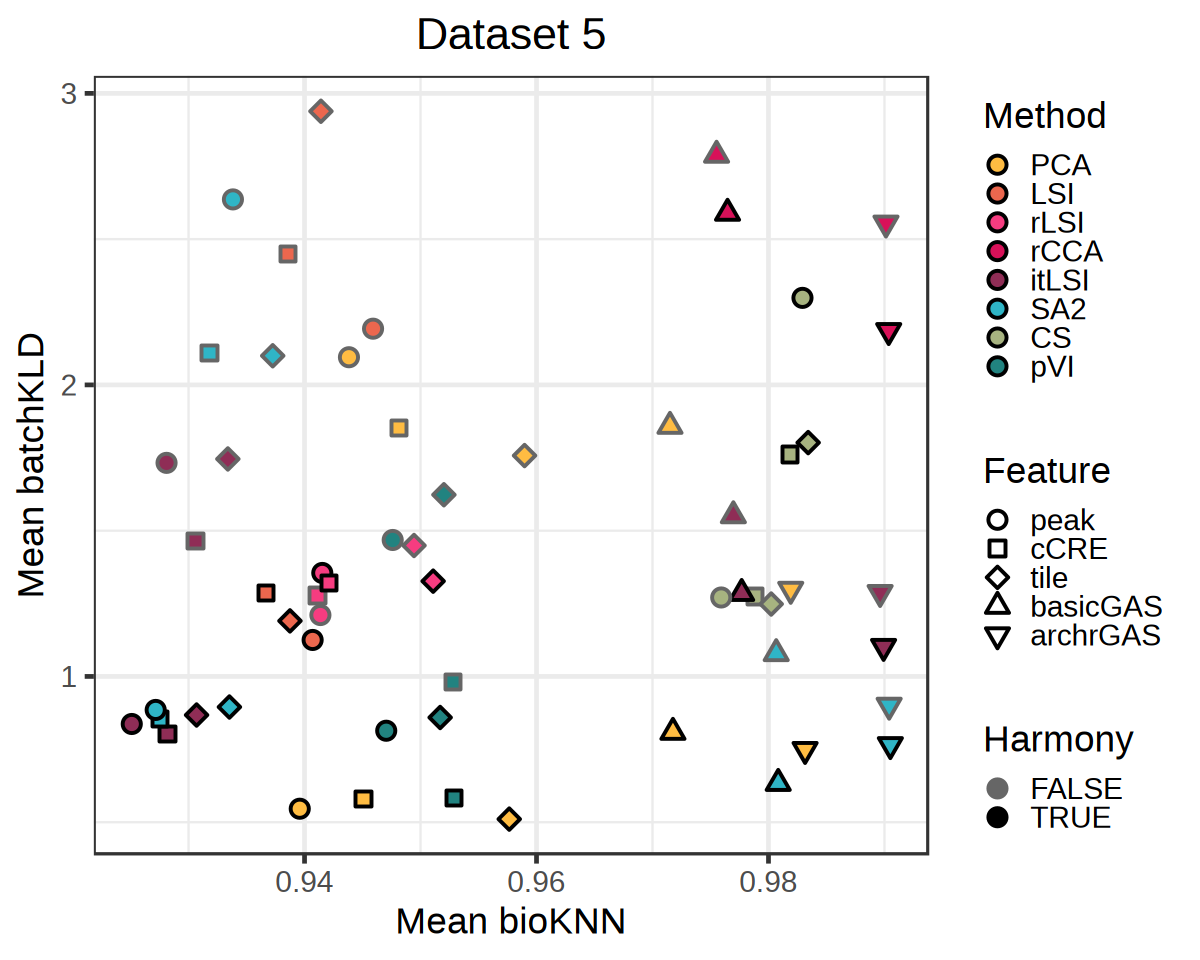

In [15]:
toPlot <- PH200_summary_df[which(PH200_summary_df$dataset=='dataset5'),]

options(repr.plot.height=8,repr.plot.width=10)
set.seed(0)
g <- ggplot(toPlot[sample(nrow(toPlot),nrow(toPlot)),],
            aes(x=CT_mean,y=sample_mean,fill=method,shape=feature,color=Harmony)) + 
        geom_point(size=4,stroke=1.25) + 
        theme_bw(base_size=22) + 
        labs(x=paste('Mean',bio_str),y=paste('Mean',batch_str),shape='Feature',fill='Method',
             title='Dataset 5') +
        theme(plot.title=element_text(hjust = 0.5),plot.subtitle=element_text(hjust = 0.5)) +
        scale_fill_manual(values=method_colors) + scale_shape_manual(values=feature_shapes) + 
        scale_color_manual(values=c('TRUE'='black','FALSE'=harmony_color)) + 
        guides(fill = guide_legend(override.aes = list(shape=21)))
print(g)

if(!is.na(save_dir)){
    ggsave(file=paste(sep='',save_dir,file_str,'_mean_ds5_scatterPlot',file_extension),
           plot=g,units='in',height=8,width=10,dpi=300)
}

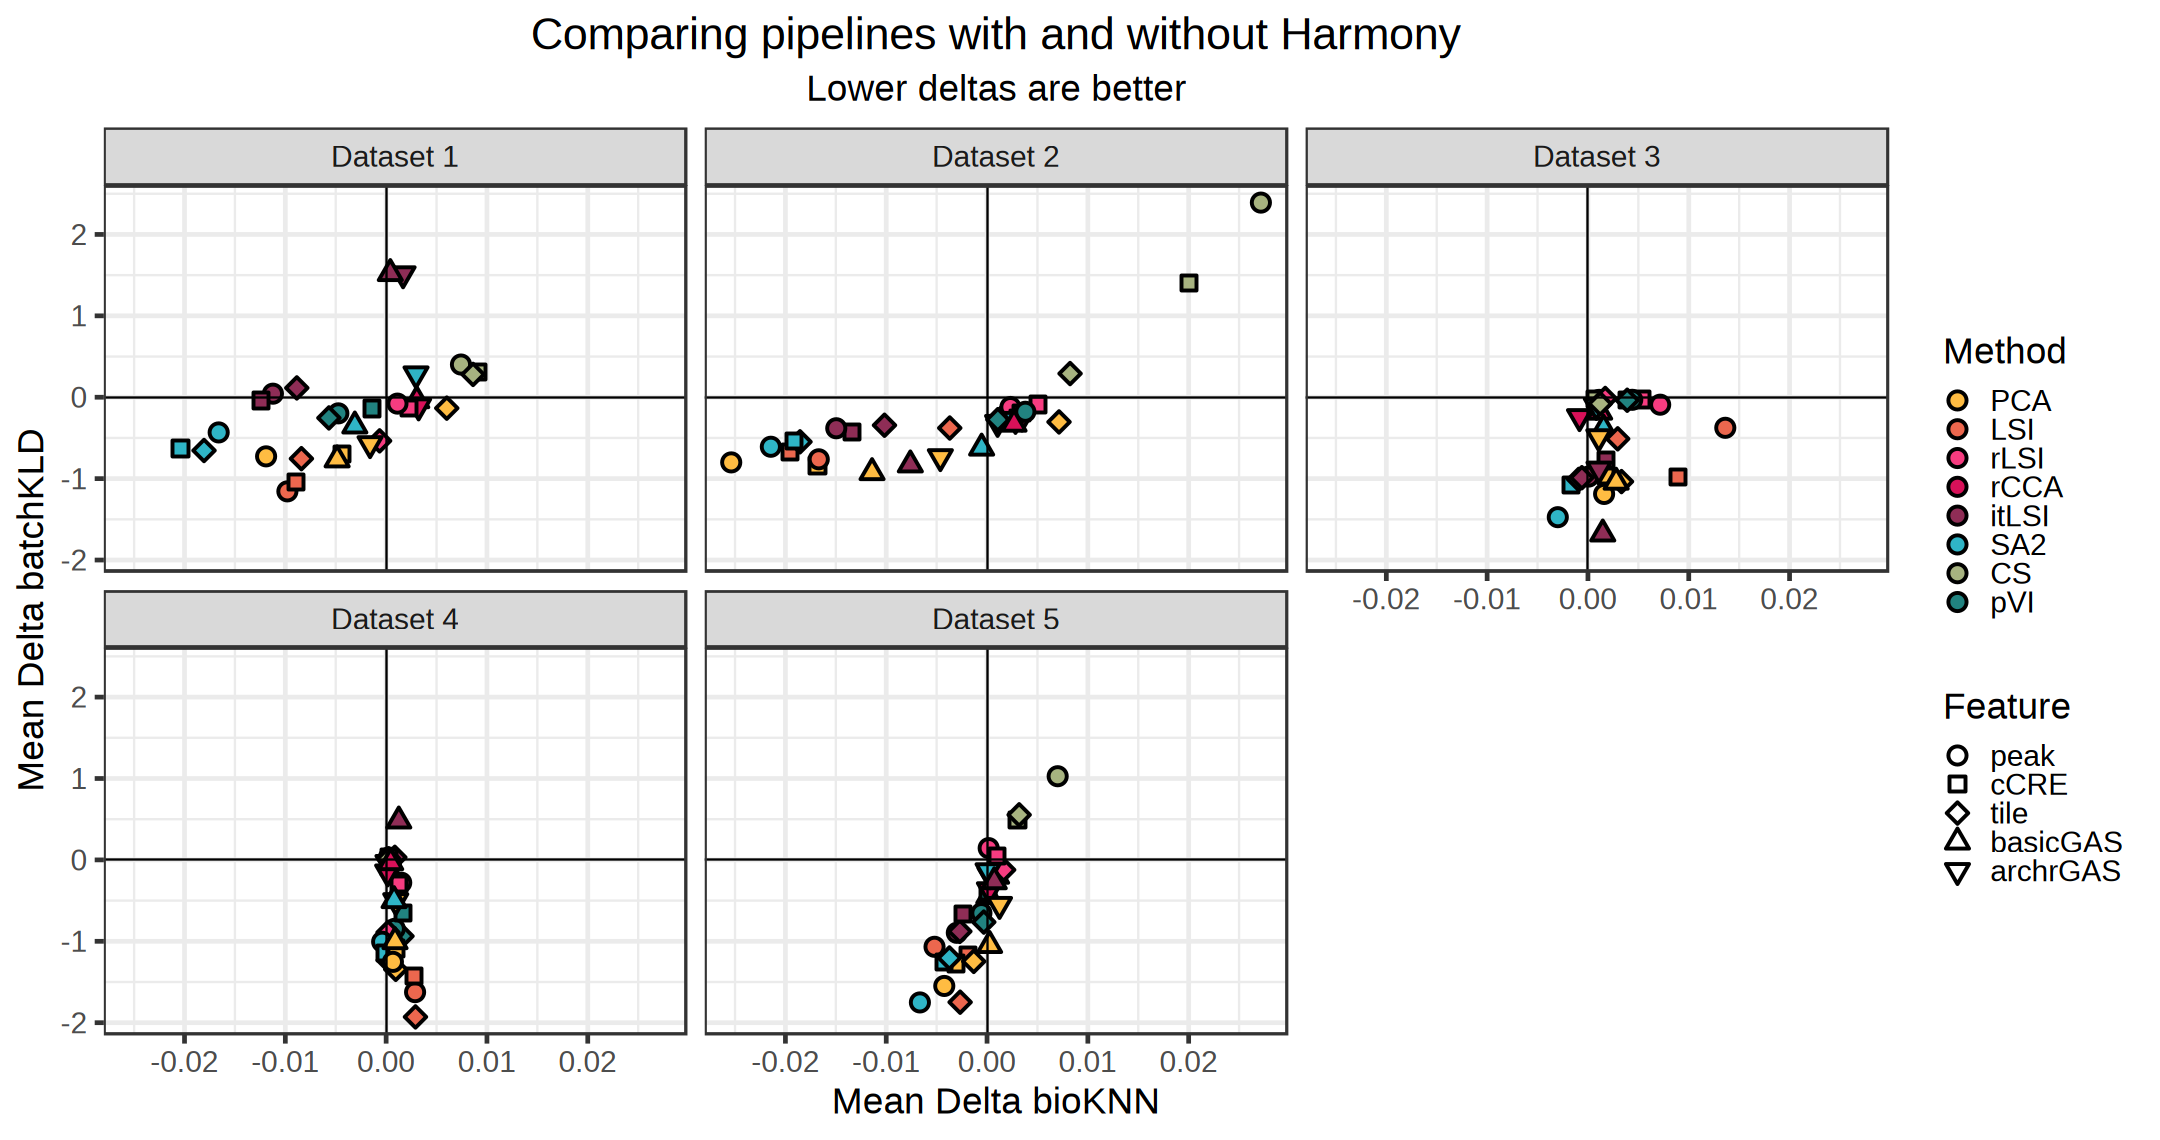

In [59]:
toPlot <- cbind(Harmony_perCell_metrics_df[,3:6],
                'delta_PH200_mKNN_missPerc'=Harmony_perCell_metrics_df$ATAC_PH200_mKNN_missPerc-noHarmony_perCell_metrics_df$ATAC_PH200_mKNN_missPerc,
                'delta_PH200_lsKLD'=Harmony_perCell_metrics_df$ATAC_PH200_lsKLD-noHarmony_perCell_metrics_df$ATAC_PH200_lsKLD,
                stringsAsFactors=FALSE)

toPlot <- makeCompDF_wNA_woTR(toPlot,'delta_PH200_lsKLD','delta_PH200_mKNN_missPerc',c('dataset','method','feature'))

toPlot$dataset <- factor(toPlot$dataset,levels=ds_vec)
toPlot$feature <- factor(toPlot$feature,levels=ft_vec)
toPlot$method <- factor(toPlot$method,levels=md_vec)

options(repr.plot.height=9.5,repr.plot.width=18)
set.seed(0)
g <- ggplot(toPlot[sample(nrow(toPlot),nrow(toPlot)),],
            aes(x=CT_mean,y=sample_mean,fill=method,shape=feature)) + 
        geom_point(size=4,stroke=1.25) + 
        theme_bw(base_size=22) + 
        labs(x=paste('Mean Delta',bio_str),y=paste('Mean Delta',batch_str),shape='Feature',fill='Method',
             subtitle='Lower deltas are better',title='Comparing pipelines with and without Harmony') +
        theme(plot.title=element_text(hjust = 0.5),plot.subtitle=element_text(hjust = 0.5)) +
        scale_fill_manual(values=method_colors) + scale_shape_manual(values=feature_shapes) +
        guides(fill = guide_legend(override.aes = list(shape=21))) +
        geom_vline(xintercept=0) + geom_hline(yintercept=0) + 
        facet_wrap(~dataset,labeller = labeller(dataset=dataset_labeller))
print(g)

if(!is.na(save_dir)){
    ggsave(file=paste(sep='',save_dir,file_str,'_meanHarmonyDelta_facetDataset_scatterPlot',file_extension),
           plot=g,units='in',height=9.5,width=18,dpi=300)
}

In [17]:
if(!is.na(save_dir)){
    saveRDS(PH200_summary_df,paste(sep='',save_dir,file_str,'_summary.rds'))
}

### Linear Models - Combined

In [18]:
PH200_both_res <- linearModel_both(PH200_summary_df,ds_ref=ds_ref,ft_ref=ft_ref,md_ref=md_ref,hm_ref=hm_ref)
PH200_both_rank <- PH200_both_res$rank
PH200_both_coeff <- PH200_both_res$coeff


Call:  glm(formula = overall_score ~ ds + ft + md + hm, family = glm_family)

Coefficients:
(Intercept)   dsdataset2   dsdataset3   dsdataset4   dsdataset5       ftcCRE  
  3.263e+01    5.189e-15    6.309e-15    5.769e-15    3.731e-15   -3.591e+00  
     ftpeak   ftarchrGAS   ftbasicGAS         mdCS      mditLSI        mdPCA  
 -4.360e+00    1.345e+01    1.049e+01    1.497e+01   -5.049e+00    6.747e-01  
      mdpVI       mdrCCA       mdrLSI        mdSA2           hm  
 -7.260e+00    3.667e+00   -2.273e+00   -6.885e+00   -6.766e+00  

Degrees of Freedom: 289 Total (i.e. Null);  273 Residual
Null Deviance:	    39830 
Residual Deviance: 12980 	AIC: 1961


In [19]:
if(!is.na(save_dir)){
    write.table(PH200_both_rank,file=paste(sep='',save_dir,file_str,'_linearMod_both_ranks.txt'),
                sep='\t',row.names=FALSE,col.names=TRUE,quote=FALSE)
    write.table(PH200_both_coeff,file=paste(sep='',save_dir,file_str,'_linearMod_both_coefficients.txt'),
                sep='\t',row.names=FALSE,col.names=TRUE,quote=FALSE)
}

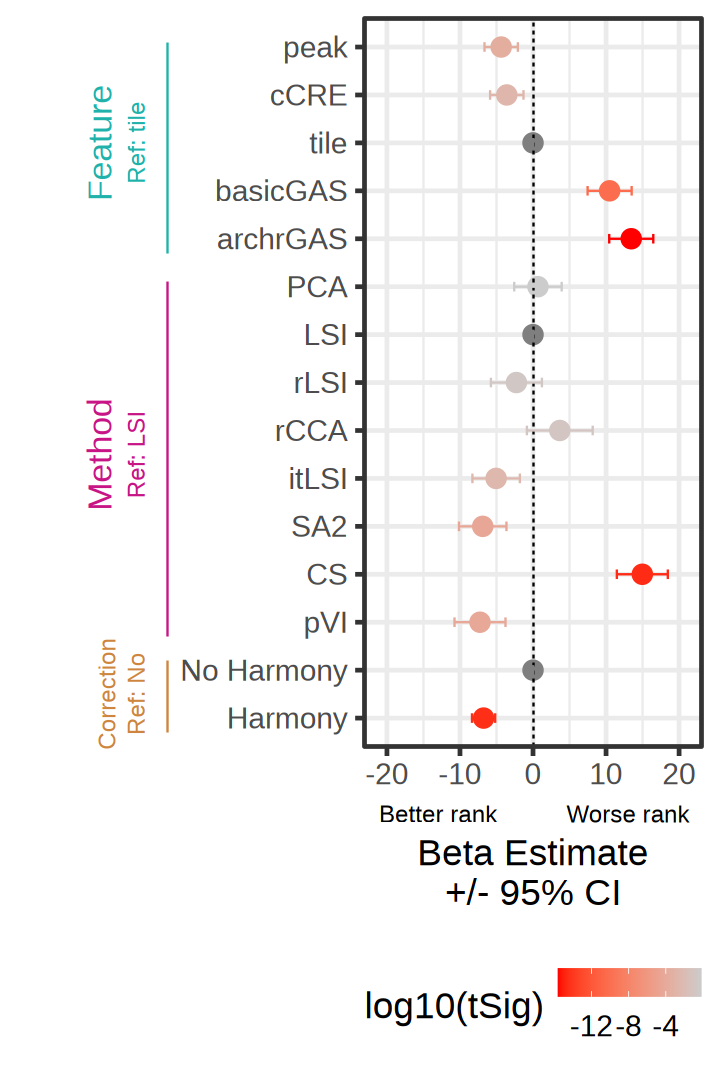

In [20]:
options(repr.plot.height=9,repr.plot.width=8)

toAdd <- data.frame('Estimate'=rep(0,3),'stdErr'=rep(0,3),'tVal'=rep(0,3),'tSig'=rep(NA,3),
                    'varName'=c(ft_ref,md_ref,'No Harmony'),
                    row.names=c(paste(sep='','ft',ft_ref),paste(sep='','md',md_ref),'nohm'),stringsAsFactors=FALSE)

toPlot <- rbind(PH200_both_coeff[grep('ft|md|hm',rownames(PH200_both_coeff)),],toAdd)
toPlot$varName <- factor(toPlot$varName,levels=rev(c(ft_vec,md_vec,'No Harmony','Harmony')))

options(repr.plot.height=9,repr.plot.width=6)
g <- ggplot(toPlot,aes(x=Estimate,y=varName,color=log10(tSig))) + geom_point(size=5) +
        theme_bw(base_size=22) + scale_color_gradient(low='red',high='grey80') +
        labs(x='\nBeta Estimate\n+/- 95% CI',y='\n\n\n') + 
        theme(plot.title=element_text(hjust = 0.5)) +
        geom_vline(xintercept=0,linetype='dashed') + 
        geom_errorbar(aes(xmin = Estimate-(stdErr*1.96),xmax = Estimate+(stdErr*1.96)),width=0.2) +
        annotate('text', y = c(6.5,13), x=-52, angle = 90,size=5,
                 label = c(paste(sep='','Ref: ',md_ref,'\n'),paste(sep='','Ref: ',ft_ref,'\n')),
                 color=variable_type_colors[c('Method','Feature')]) +
        annotate('text', y = c(6.5,13), x=-56, label = c('Method\n','Feature\n'),angle = 90,size=7,
                 color=variable_type_colors[c('Method','Feature')]) +
        annotate('text', y = 1.5, x=-52, label = 'Ref: No\n',angle = 90,size=5,color=variable_type_colors['Correction']) +
        annotate('text', y = 1.5, x=-56, label = 'Correction\n',angle = 90,size=5,
                 color=variable_type_colors['Correction']) +
        annotate('segment',y=2.7,yend=10.1,x=-50,color=variable_type_colors['Method']) + 
        annotate('segment',y=10.7,yend=15.1,x=-50,color=variable_type_colors['Feature']) + 
        annotate('segment',y=0.7,yend=2.2,x=-50,color=variable_type_colors['Correction']) +
        annotate('text', x = c(-13,13), y=-1, label = c('Better rank','Worse rank'),size=5) +
        coord_cartesian(xlim = c(-21, 21), ylim=c(1,15), clip = "off") +
        theme(legend.position = "bottom") 
print(g)

if(!is.na(save_dir)){
    ggsave(file=paste(sep='',save_dir,file_str,'_linearMod_both_ranks',file_extension),
           plot=g,units='in',height=9,width=6,dpi=300)
}

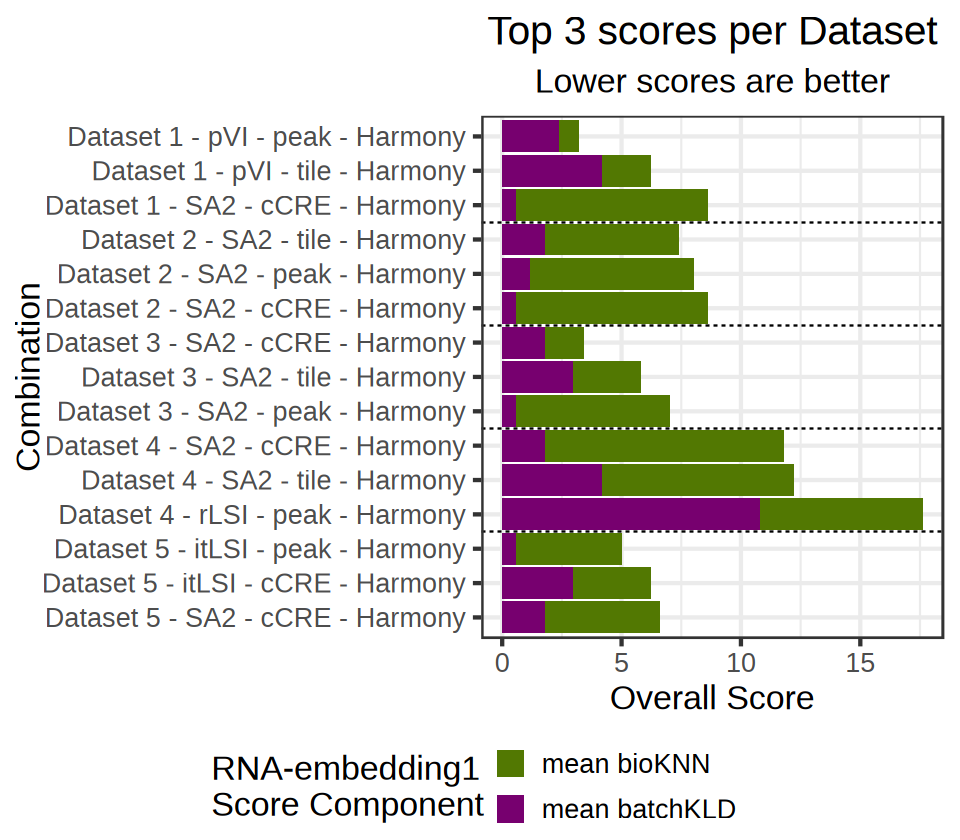

In [21]:
for(ds in sort(unique(PH200_both_rank$dataset))){
    
    ll <- PH200_both_rank[which(PH200_both_rank$dataset==ds),]
    ll <- head(ll[order(ll$overall_score,decreasing=FALSE),],n=3)
    
    if(ds==sort(unique(PH200_both_rank$dataset))[1]) {
        toPlot <- ll
    } else {
        toPlot <- rbind(toPlot,ll)
    }
}


toPlot$bio_score <- toPlot$mean_bio_rank * 0.6
toPlot$batch_score <- toPlot$mean_batch_rank * 0.4
if(!identical(toPlot$bio_score+toPlot$batch_score,toPlot$overall_score)) stop('score issue')
toPlot$combo <- paste(sep=' - ',dataset_labeller[toPlot$dataset], toPlot$method, toPlot$feature, toPlot$Harmony)
ord <- toPlot$combo

toPlot <- toPlot[,c('combo','bio_score','batch_score','overall_score')]
toPlot <- tidyr::gather(toPlot,'score_comp','score_val',all_of(c('bio_score','batch_score')))
toPlot$combo <- factor(toPlot$combo, levels=rev(ord))

options(repr.plot.height=7,repr.plot.width=8)
g <- ggplot(toPlot,aes(x=score_val,y=combo,fill=score_comp)) + geom_bar(position="stack", stat="identity") + 
        theme_bw(base_size=20) + theme(plot.title = element_text(hjust = 0.5),plot.subtitle = element_text(hjust = 0.5)) +
        labs(x='Overall Score', y='Combination', fill=paste(sep='\n',sub('NN metrics - ','',title_str),'Score Component'), 
             title = 'Top 3 scores per Dataset', subtitle='Lower scores are better') +
        geom_hline(yintercept=c(3.5,6.5,9.5,12.5),linetype='dashed') +
        theme(legend.position = "bottom") + theme(legend.margin = margin(l = -0.6, unit = "npc")) + 
        guides(fill=guide_legend(nrow=2,byrow=TRUE)) + 
        scale_fill_manual(labels = c(paste("mean",bio_str), paste("mean",batch_str)),
                          values = c(batch_color, bio_color)) 
print(g)

if(!is.na(save_dir)){
    ggsave(file=paste(sep='',save_dir,file_str,'_linearMod_both_top3_barPlot',file_extension),
           plot=g,units='in',height=7,width=8,dpi=300)
}

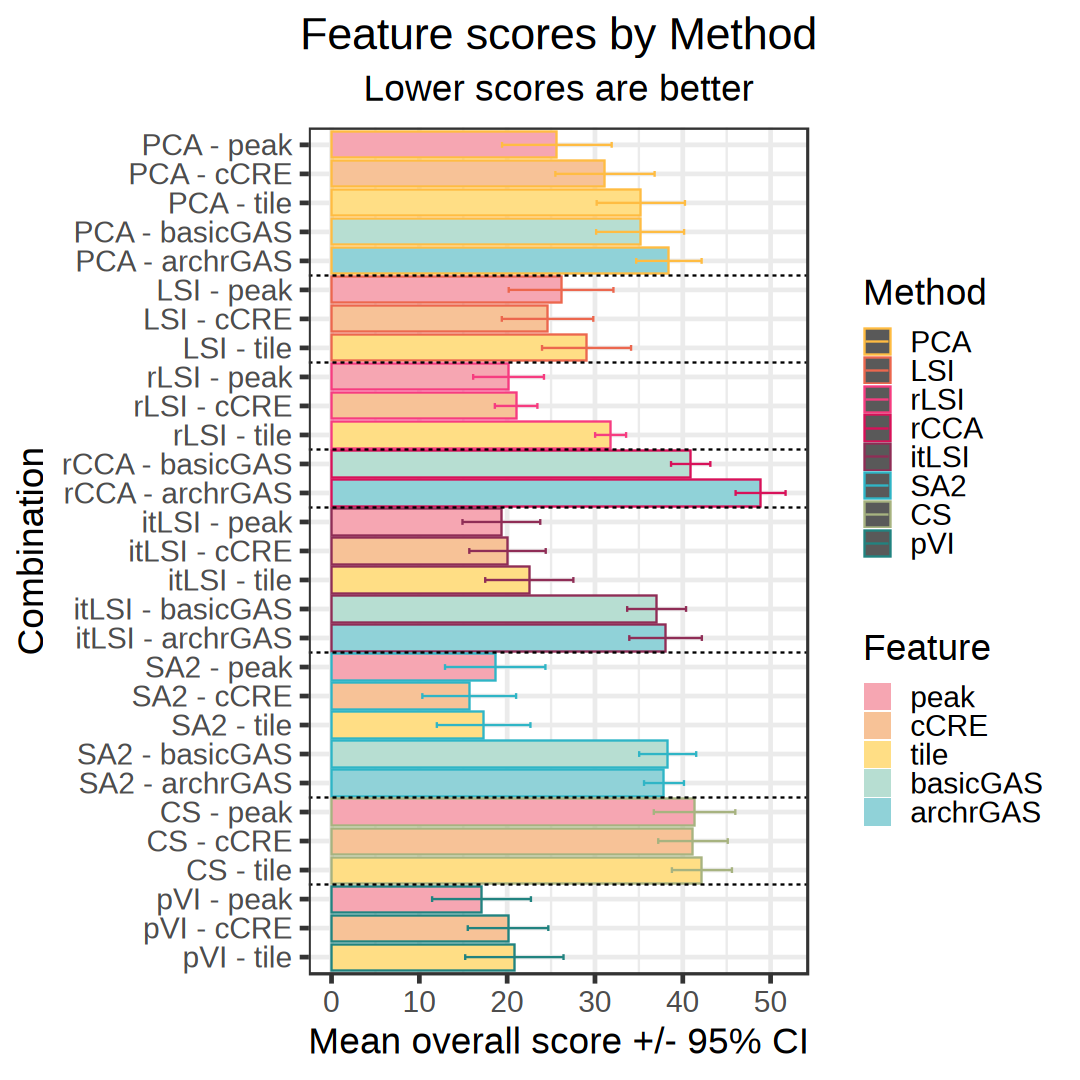

In [22]:
toPlot <- PH200_both_rank %>% 
        group_by(method,feature) %>%
        summarize(mean_score = mean(overall_score), stdErr=stdErr_calc(overall_score),.groups = 'drop') %>% 
        ungroup() %>% as.data.frame(stringsAsFactors=FALSE)
toPlot$combo <- paste(sep=' - ',toPlot$method,toPlot$feature)
toPlot$method <- factor(toPlot$method,levels=md_vec)
toPlot$feature <- factor(toPlot$feature,levels=ft_vec)
toPlot <- toPlot[order(toPlot$method,toPlot$feature),]
toPlot$combo <- factor(toPlot$combo,levels=rev(toPlot$combo))

options(repr.plot.height=9,repr.plot.width=9)
g <- ggplot(toPlot,aes(x=mean_score,y=combo,fill=feature,color=method)) + geom_bar(stat='identity',position='dodge') +
        theme_bw(base_size=22) + scale_fill_manual(values=feature_colors) + scale_color_manual(values=method_colors) +
        labs(x='Mean overall score +/- 95% CI',
             y='Combination',fill='Feature',color='Method',title='Feature scores by Method',
             subtitle='Lower scores are better') +
        geom_hline(yintercept=c(3.5,6.5,11.5,16.5,18.5,21.5,24.5),linetype='dashed') +
        geom_errorbar(aes(xmin = mean_score-(stdErr*1.96),xmax = mean_score+(stdErr*1.96)),width=0.2) +
        theme(plot.title = element_text(hjust = 0.5),plot.subtitle = element_text(hjust = 0.5))
print(g)

if(!is.na(save_dir)){
    ggsave(file=paste(sep='',save_dir,file_str,'_linearMod_both_aggrFeat_barPlot',file_extension),
           plot=g,units='in',height=9,width=9,dpi=300)
}

### Linear Models - Separate

In [23]:
PH200_sep_res <- linearModel_sep(PH200_summary_df,ds_ref=ds_ref,ft_ref=ft_ref,md_ref=md_ref,hm_ref=hm_ref)
PH200_sep_rank <- PH200_sep_res$rank
PH200_sep_coeff <- PH200_sep_res$coeff


Call:  glm(formula = bio_score ~ ds + ft + md + hm, family = glm_family)

Coefficients:
(Intercept)   dsdataset2   dsdataset3   dsdataset4   dsdataset5       ftcCRE  
  2.527e+01   -2.079e-17   -2.088e-16   -2.024e-15   -1.171e-15   -4.586e+00  
     ftpeak   ftarchrGAS   ftbasicGAS         mdCS      mditLSI        mdPCA  
 -6.771e+00    2.763e+01    1.813e+01    3.203e+01   -1.045e+01    4.413e+00  
      mdpVI       mdrCCA       mdrLSI        mdSA2           hm  
  1.367e+00   -3.667e+00    2.700e+00   -9.267e+00   -3.655e-01  

Degrees of Freedom: 289 Total (i.e. Null);  273 Residual
Null Deviance:	    81270 
Residual Deviance: 18580 	AIC: 2065

Call:  glm(formula = batch_score ~ ds + ft + md + hm, family = glm_family)

Coefficients:
(Intercept)   dsdataset2   dsdataset3   dsdataset4   dsdataset5       ftcCRE  
  4.366e+01    3.305e-15    3.023e-15    2.852e-15    2.917e-15   -2.100e+00  
     ftpeak   ftarchrGAS   ftbasicGAS         mdCS      mditLSI        mdPCA  
 -7.429e-01   -

In [24]:
if(!is.na(save_dir)){
    write.table(PH200_sep_rank,file=paste(sep='',save_dir,file_str,'_linearMod_sep_ranks.txt'),
                sep='\t',row.names=FALSE,col.names=TRUE,quote=FALSE)
    write.table(PH200_sep_coeff,file=paste(sep='',save_dir,file_str,'_linearMod_sep_coefficients.txt'),
                sep='\t',row.names=FALSE,col.names=TRUE,quote=FALSE)
}

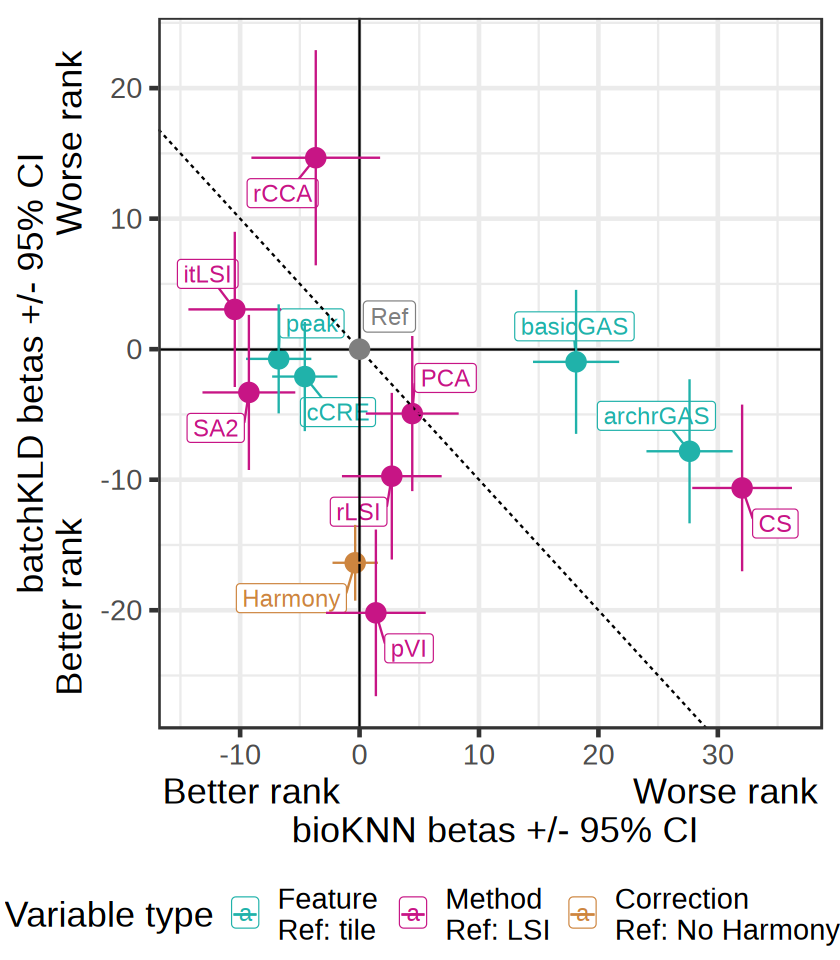

In [25]:
toPlot <- PH200_sep_coeff[grep('ft|md|hm',rownames(PH200_sep_coeff)),]

options(repr.plot.height=8,repr.plot.width=7)
g <- ggplot(toPlot,aes(x=bio_Estimate,y=batch_Estimate,label=varName,color=varType)) + geom_point(size=5) +
        theme_bw(base_size=21.5) + geom_label_repel(size=5,box.padding = 0.8) +
        labs(x=paste('Better rank                             Worse rank\n',bio_str,'betas +/- 95% CI'),
             y=paste(batch_str,'betas +/- 95% CI\nBetter rank                            Worse rank'),
             color='Variable type') +
        theme(plot.title=element_text(hjust = 0.5)) +
        scale_color_manual(labels = c('Feature'=paste(sep='','Feature\nRef: ',ft_ref), 
                                      'Method'=paste(sep='','Method\nRef: ',md_ref), 
                                      'Correction'='Correction\nRef: No Harmony'),
                           values = variable_type_colors) + 
        geom_vline(xintercept=0) + geom_hline(yintercept=0) + geom_abline(slope=-1,intercept=0,linetype='dashed') +
        geom_errorbar(aes(xmin = bio_Estimate-(bio_stdErr*1.96),xmax = bio_Estimate+(bio_stdErr*1.96)),width=0) +
        geom_errorbar(aes(ymin = batch_Estimate-(batch_stdErr*1.96),ymax = batch_Estimate+(batch_stdErr*1.96)),width=0) +
        annotate('point',x=0,y=0,colour=ref_color,size=5) + 
        annotate('label',x=2.5,y=2.5,label='Ref',colour=ref_color,size=5) +
        theme(legend.position = "bottom") + theme(legend.margin = margin(l = -0.17, unit = "npc"))
print(g)

if(!is.na(save_dir)){
    ggsave(file=paste(sep='',save_dir,file_str,'_linearMod_sep_ranks_scatterPlot',file_extension),
           plot=g,units='in',height=8,width=7,dpi=300)
}

## NN metrics - RNA-embedding2

In [26]:
title_str <- 'NN metrics - RNA-embedding2'
bio_str <- 'bioKNN'
batch_str <- 'batchKLD'
file_str <- 'ST200'

### Mean Scatterplots

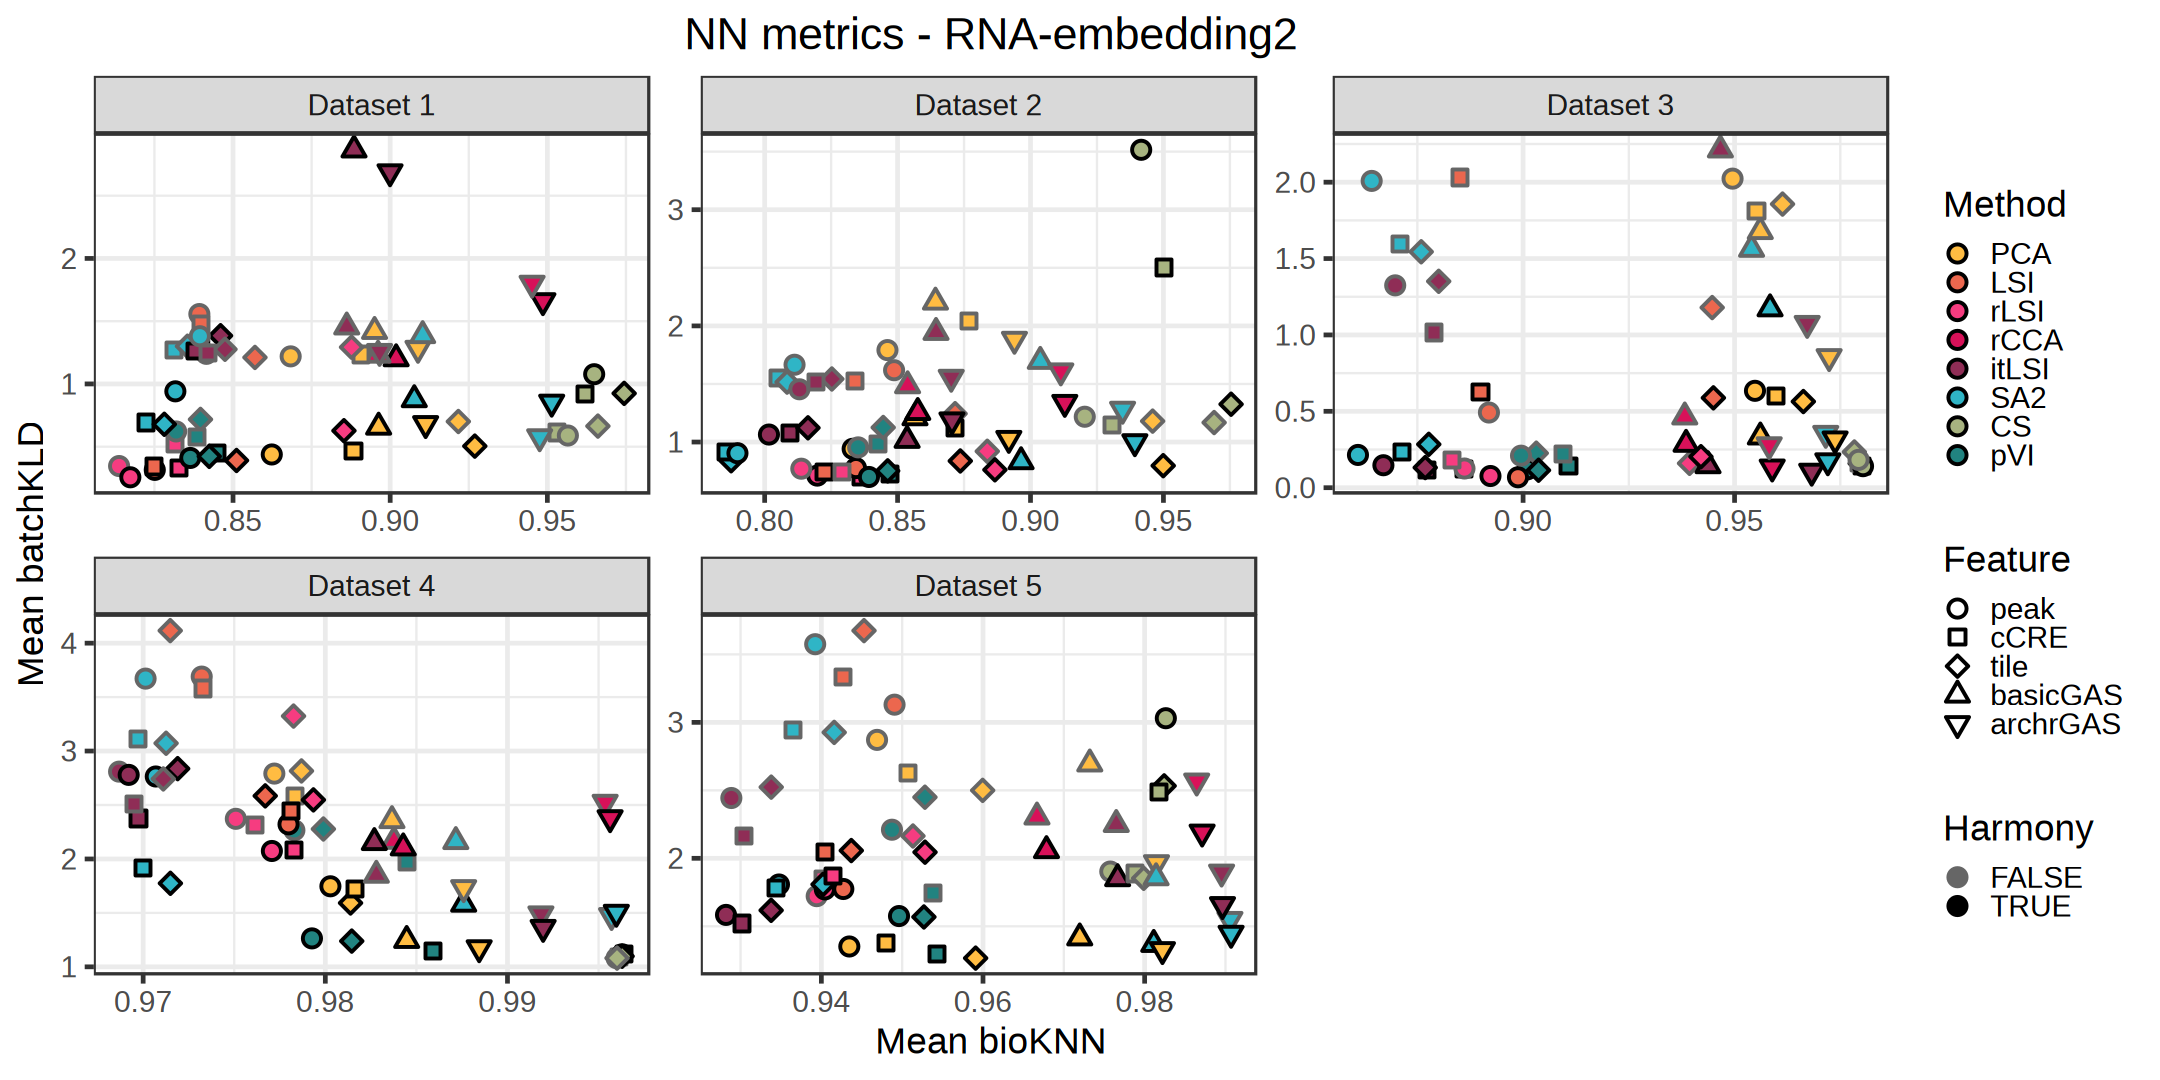

In [27]:
ST200_summary_df <- makeCompDF_wNA_woTR(perCell_metrics_df,'ATAC_ST200_lsKLD','ATAC_ST200_mKNN_missPerc',
                                        c('dataset','method','feature','Harmony'))

ST200_summary_df$dataset <- factor(ST200_summary_df$dataset,levels=ds_vec)
ST200_summary_df$feature <- factor(ST200_summary_df$feature,levels=ft_vec)
ST200_summary_df$method <- factor(ST200_summary_df$method,levels=md_vec)

options(repr.plot.height=9,repr.plot.width=18)
set.seed(0)
g <- ggplot(ST200_summary_df[sample(nrow(ST200_summary_df),nrow(ST200_summary_df)),],
            aes(x=CT_mean,y=sample_mean,fill=method,shape=feature,color=Harmony)) + 
        geom_point(size=4,stroke=1.25) + 
        theme_bw(base_size=22) + 
        labs(x=paste('Mean',bio_str),y=paste('Mean',batch_str),shape='Feature',fill='Method',title=title_str) +
        theme(plot.title=element_text(hjust = 0.5)) +
        scale_fill_manual(values=method_colors) + scale_shape_manual(values=feature_shapes) + 
        scale_color_manual(values=c('TRUE'='black','FALSE'=harmony_color)) + 
        guides(fill = guide_legend(override.aes = list(shape=21))) +
        facet_wrap(~dataset,scales = "free",labeller = labeller(dataset=dataset_labeller))
print(g)

if(!is.na(save_dir)){
    ggsave(file=paste(sep='',save_dir,file_str,'_mean_facetDataset_scatterPlot',file_extension),
           plot=g,units='in',height=9,width=18,dpi=300)
}

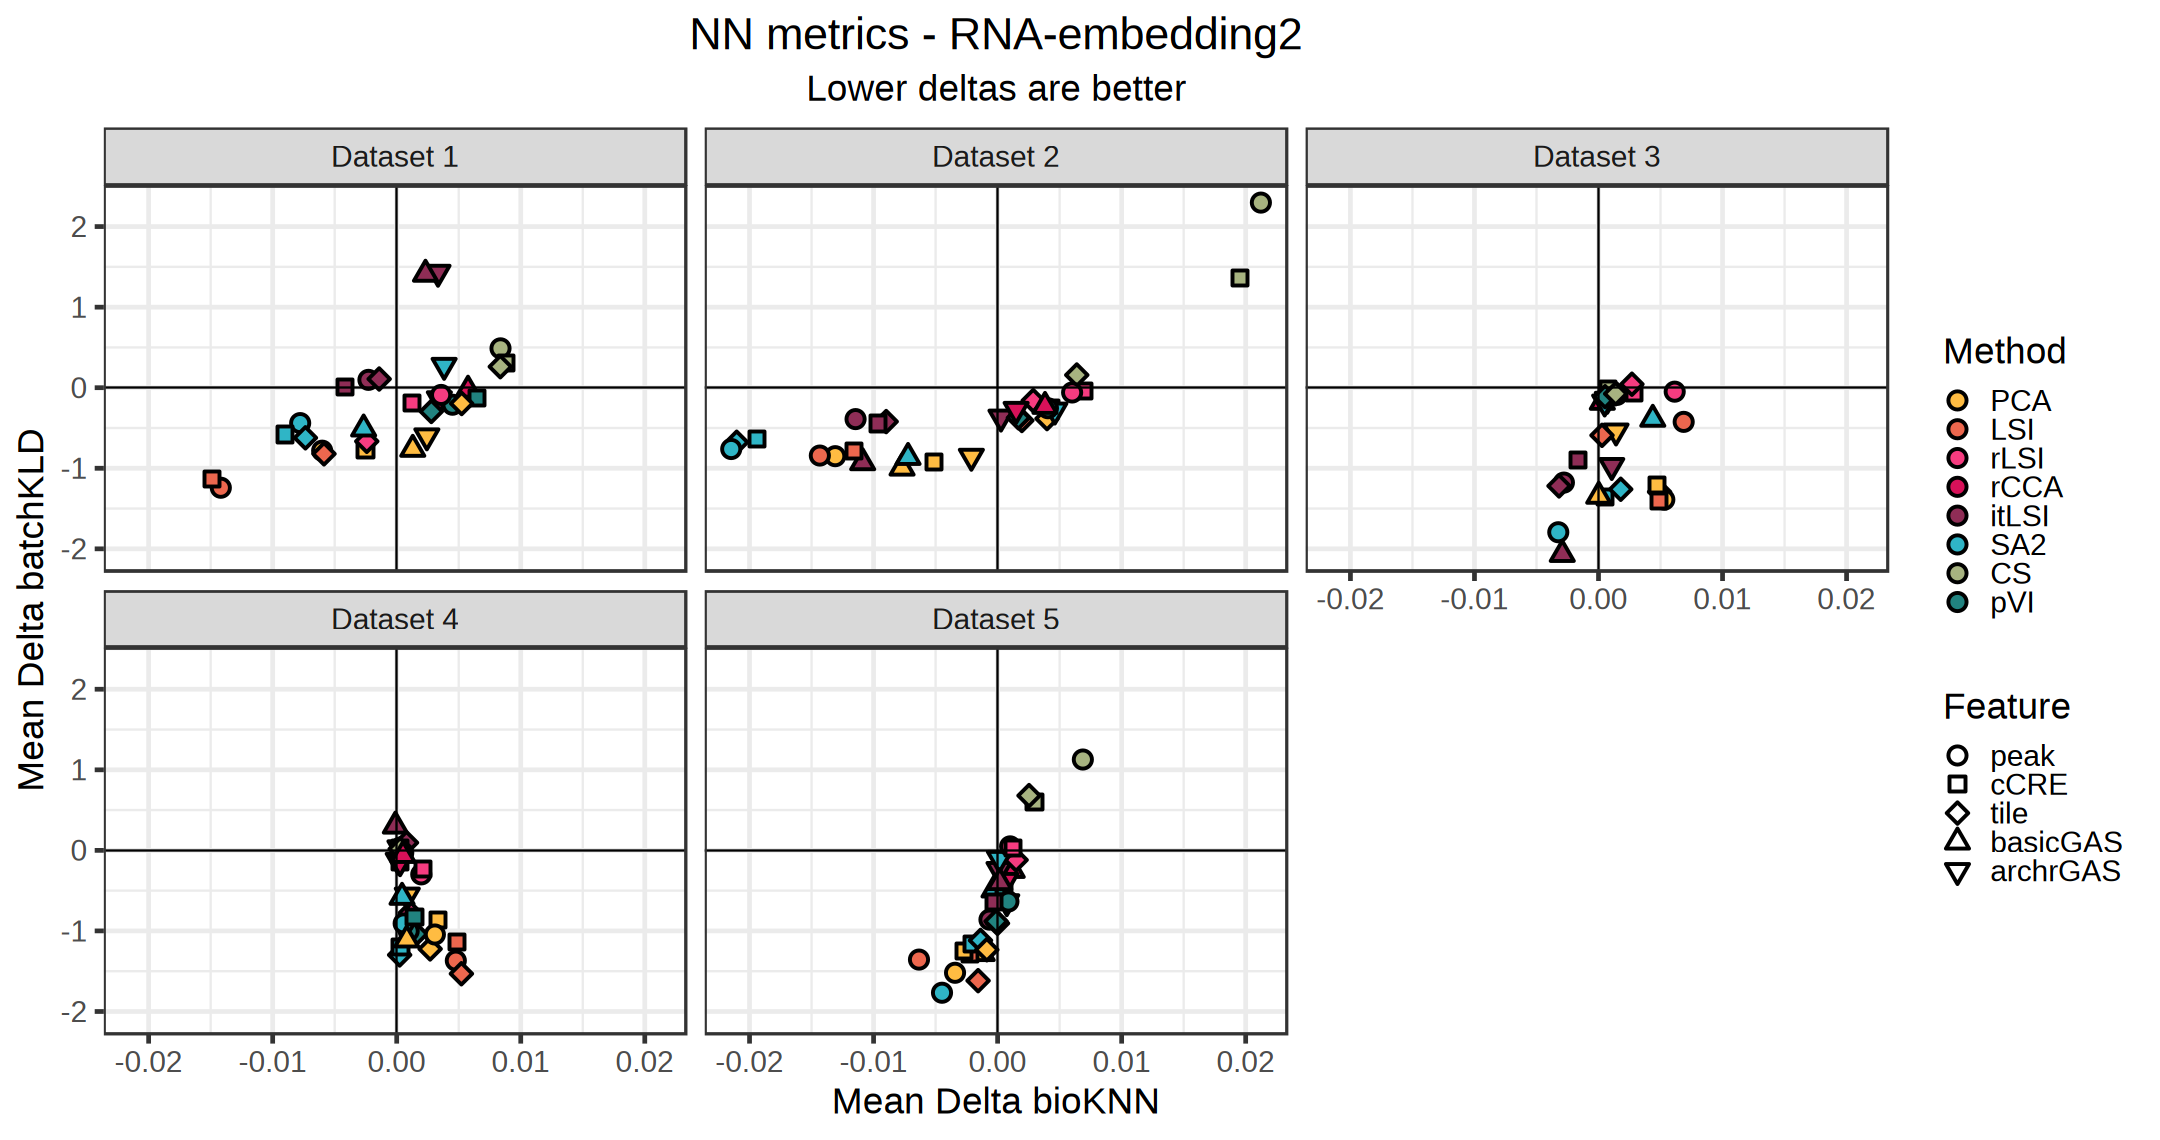

In [28]:
toPlot <- cbind(Harmony_perCell_metrics_df[,3:6],
                'delta_ST200_mKNN_missPerc'=Harmony_perCell_metrics_df$ATAC_ST200_mKNN_missPerc-noHarmony_perCell_metrics_df$ATAC_ST200_mKNN_missPerc,
                'delta_ST200_lsKLD'=Harmony_perCell_metrics_df$ATAC_ST200_lsKLD-noHarmony_perCell_metrics_df$ATAC_ST200_lsKLD,
                stringsAsFactors=FALSE)

toPlot <- makeCompDF_wNA_woTR(toPlot,'delta_ST200_lsKLD','delta_ST200_mKNN_missPerc',
                              c('dataset','method','feature'))

toPlot$dataset <- factor(toPlot$dataset,levels=ds_vec)
toPlot$feature <- factor(toPlot$feature,levels=ft_vec)
toPlot$method <- factor(toPlot$method,levels=md_vec)

options(repr.plot.height=9.5,repr.plot.width=18)
set.seed(0)
g <- ggplot(toPlot[sample(nrow(toPlot),nrow(toPlot)),],
            aes(x=CT_mean,y=sample_mean,fill=method,shape=feature)) + 
        geom_point(size=4,stroke=1.25) + 
        theme_bw(base_size=22) + 
        labs(x=paste('Mean Delta',bio_str),y=paste('Mean Delta',batch_str),shape='Feature',fill='Method',
             title=title_str,subtitle='Lower deltas are better') +
        theme(plot.title=element_text(hjust = 0.5),plot.subtitle=element_text(hjust = 0.5)) +
        scale_fill_manual(values=method_colors) + scale_shape_manual(values=feature_shapes) +
        guides(fill = guide_legend(override.aes = list(shape=21))) +
        geom_vline(xintercept=0) + geom_hline(yintercept=0) + 
        facet_wrap(~dataset,labeller = labeller(dataset=dataset_labeller))
print(g)

if(!is.na(save_dir)){
    ggsave(file=paste(sep='',save_dir,file_str,'_meanHarmonyDelta_facetDataset_scatterPlot',file_extension),
           plot=g,units='in',height=9.5,width=18,dpi=300)
}

In [29]:
if(!is.na(save_dir)){
    saveRDS(ST200_summary_df,paste(sep='',save_dir,file_str,'_summary.rds'))
}

### Linear Models - Combined

In [30]:
ST200_both_res <- linearModel_both(ST200_summary_df,ds_ref=ds_ref,ft_ref=ft_ref,md_ref=md_ref,hm_ref=hm_ref)
ST200_both_rank <- ST200_both_res$rank
ST200_both_coeff <- ST200_both_res$coeff


Call:  glm(formula = overall_score ~ ds + ft + md + hm, family = glm_family)

Coefficients:
(Intercept)   dsdataset2   dsdataset3   dsdataset4   dsdataset5       ftcCRE  
  3.288e+01    3.655e-15    3.921e-15    3.194e-15    3.027e-15   -4.597e+00  
     ftpeak   ftarchrGAS   ftbasicGAS         mdCS      mditLSI        mdPCA  
 -5.840e+00    1.255e+01    8.375e+00    1.556e+01   -5.228e+00    3.108e+00  
      mdpVI       mdrCCA       mdrLSI        mdSA2           hm  
 -4.533e+00   -4.611e-01   -6.947e+00   -4.932e+00   -5.839e+00  

Degrees of Freedom: 289 Total (i.e. Null);  273 Residual
Null Deviance:	    39570 
Residual Deviance: 14320 	AIC: 1990


In [31]:
if(!is.na(save_dir)){
    write.table(ST200_both_rank,file=paste(sep='',save_dir,file_str,'_linearMod_both_ranks.txt'),
                sep='\t',row.names=FALSE,col.names=TRUE,quote=FALSE)
    write.table(ST200_both_coeff,file=paste(sep='',save_dir,file_str,'_linearMod_both_coefficients.txt'),
                sep='\t',row.names=FALSE,col.names=TRUE,quote=FALSE)
}

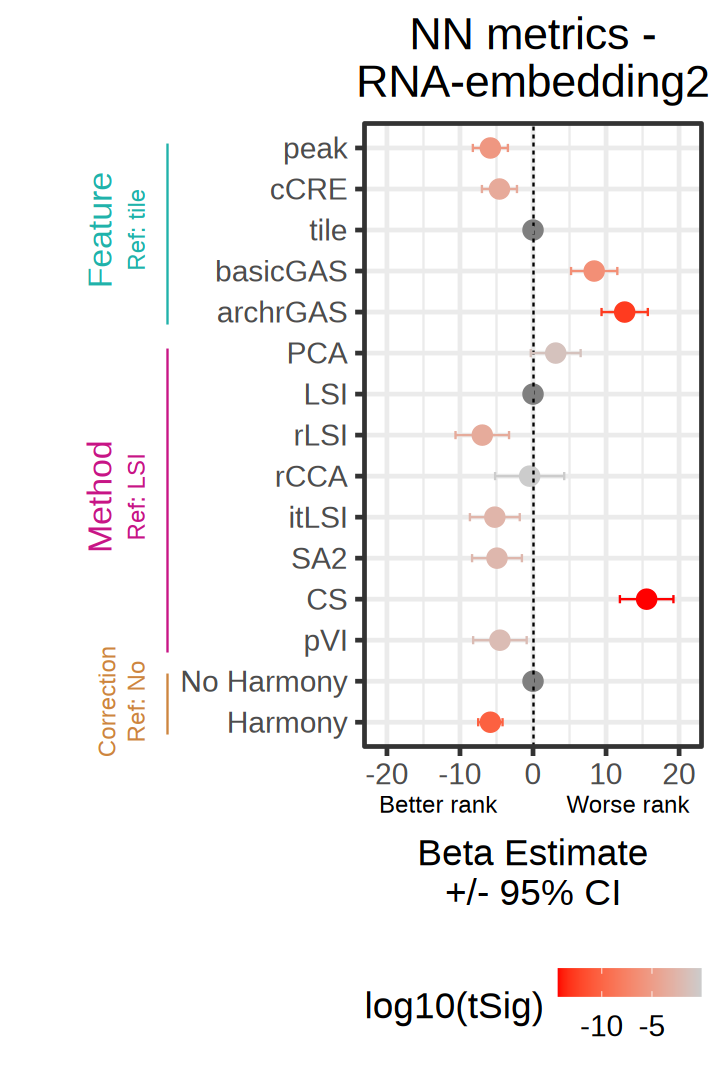

In [32]:
options(repr.plot.height=9,repr.plot.width=8)

toAdd <- data.frame('Estimate'=rep(0,3),'stdErr'=rep(0,3),'tVal'=rep(0,3),'tSig'=rep(NA,3),
                    'varName'=c(ft_ref,md_ref,'No Harmony'),
                    row.names=c(paste(sep='','ft',ft_ref),paste(sep='','md',md_ref),'nohm'),stringsAsFactors=FALSE)

toPlot <- rbind(ST200_both_coeff[grep('ft|md|hm',rownames(ST200_both_coeff)),],toAdd)
toPlot$varName <- factor(toPlot$varName,levels=rev(c(ft_vec,md_vec,'No Harmony','Harmony')))

options(repr.plot.height=9,repr.plot.width=6)
g <- ggplot(toPlot,aes(x=Estimate,y=varName,color=log10(tSig))) + geom_point(size=5) +
        theme_bw(base_size=22) + scale_color_gradient(low='red',high='grey80') +
        labs(x='\nBeta Estimate\n+/- 95% CI',y='\n\n\n',title=sub(' - ',' -\n',title_str)) + 
        theme(plot.title=element_text(hjust = 0.5)) +
        geom_vline(xintercept=0,linetype='dashed') + 
        geom_errorbar(aes(xmin = Estimate-(stdErr*1.96),xmax = Estimate+(stdErr*1.96)),width=0.2) +
        annotate('text', y = c(6.5,13), x=-52, angle = 90,size=5,
                 label = c(paste(sep='','Ref: ',md_ref,'\n'),paste(sep='','Ref: ',ft_ref,'\n')),
                 color=variable_type_colors[c('Method','Feature')]) +
        annotate('text', y = c(6.5,13), x=-56, label = c('Method\n','Feature\n'),angle = 90,size=7,
                 color=variable_type_colors[c('Method','Feature')]) +
        annotate('text', y = 1.5, x=-52, label = 'Ref: No\n',angle = 90,size=5,color=variable_type_colors['Correction']) +
        annotate('text', y = 1.5, x=-56, label = 'Correction\n',angle = 90,size=5,
                 color=variable_type_colors['Correction']) +
        annotate('segment',y=2.7,yend=10.1,x=-50,color=variable_type_colors['Method']) + 
        annotate('segment',y=10.7,yend=15.1,x=-50,color=variable_type_colors['Feature']) + 
        annotate('segment',y=0.7,yend=2.2,x=-50,color=variable_type_colors['Correction']) +
        annotate('text', x = c(-13,13), y=-1, label = c('Better rank','Worse rank'),size=5) +
        coord_cartesian(xlim = c(-21, 21), ylim=c(1,15), clip = "off") +
        theme(legend.position = "bottom") 
print(g)

if(!is.na(save_dir)){
    ggsave(file=paste(sep='',save_dir,file_str,'_linearMod_both_ranks',file_extension),
           plot=g,units='in',height=9,width=6,dpi=300)
}

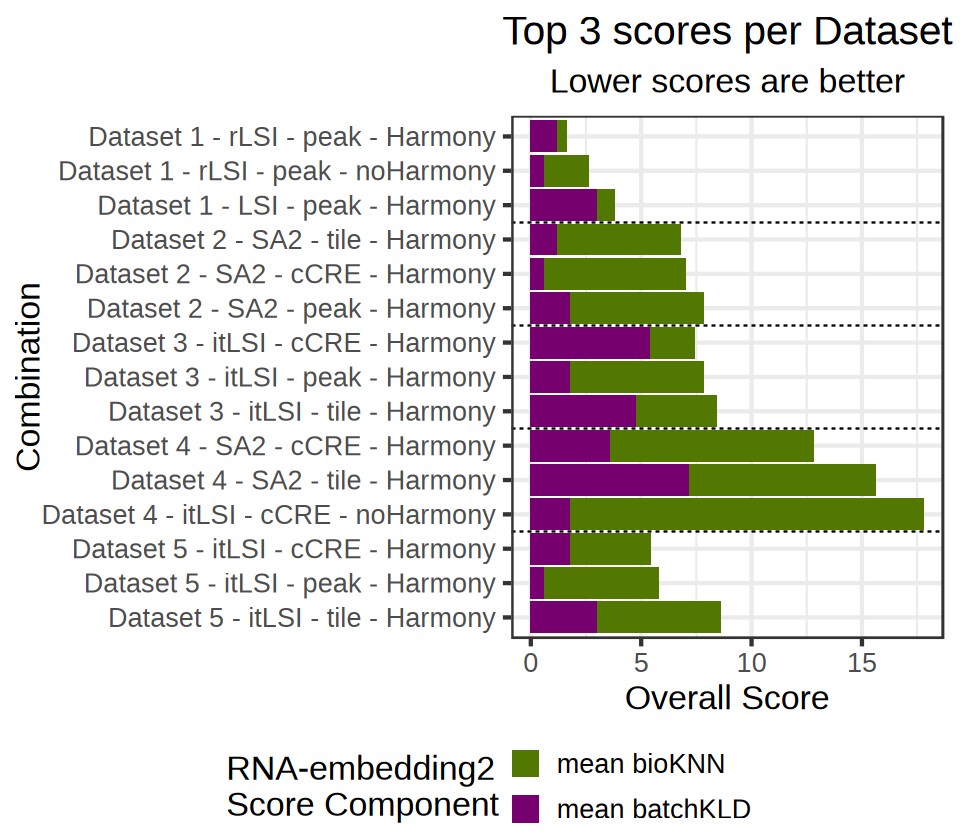

In [33]:
for(ds in sort(unique(ST200_both_rank$dataset))){
    
    ll <- ST200_both_rank[which(ST200_both_rank$dataset==ds),]
    ll <- head(ll[order(ll$overall_score,decreasing=FALSE),],n=3)
    
    if(ds==sort(unique(ST200_both_rank$dataset))[1]) {
        toPlot <- ll
    } else {
        toPlot <- rbind(toPlot,ll)
    }
}


toPlot$bio_score <- toPlot$mean_bio_rank * 0.6
toPlot$batch_score <- toPlot$mean_batch_rank * 0.4
if(!identical(toPlot$bio_score+toPlot$batch_score,toPlot$overall_score)) stop('score issue')
toPlot$combo <- paste(sep=' - ',dataset_labeller[toPlot$dataset], toPlot$method, toPlot$feature, toPlot$Harmony)
ord <- toPlot$combo

toPlot <- toPlot[,c('combo','bio_score','batch_score','overall_score')]
toPlot <- tidyr::gather(toPlot,'score_comp','score_val',all_of(c('bio_score','batch_score')))
toPlot$combo <- factor(toPlot$combo, levels=rev(ord))

options(repr.plot.height=7,repr.plot.width=8)
g <- ggplot(toPlot,aes(x=score_val,y=combo,fill=score_comp)) + geom_bar(position="stack", stat="identity") + 
        theme_bw(base_size=20) + theme(plot.title = element_text(hjust = 0.5),plot.subtitle = element_text(hjust = 0.5)) +
        labs(x='Overall Score', y='Combination', fill=paste(sep='\n',sub('NN metrics - ','',title_str),'Score Component'), 
             title = 'Top 3 scores per Dataset', subtitle='Lower scores are better') +
        geom_hline(yintercept=c(3.5,6.5,9.5,12.5),linetype='dashed') +
        theme(legend.position = "bottom") + theme(legend.margin = margin(l = -0.6, unit = "npc")) + 
        guides(fill=guide_legend(nrow=2,byrow=TRUE)) + 
        scale_fill_manual(labels = c(paste("mean",bio_str), paste("mean",batch_str)),
                          values = c(batch_color, bio_color)) 
print(g)

if(!is.na(save_dir)){
    ggsave(file=paste(sep='',save_dir,file_str,'_linearMod_both_top3_barPlot',file_extension),
           plot=g,units='in',height=7,width=8,dpi=300)
}

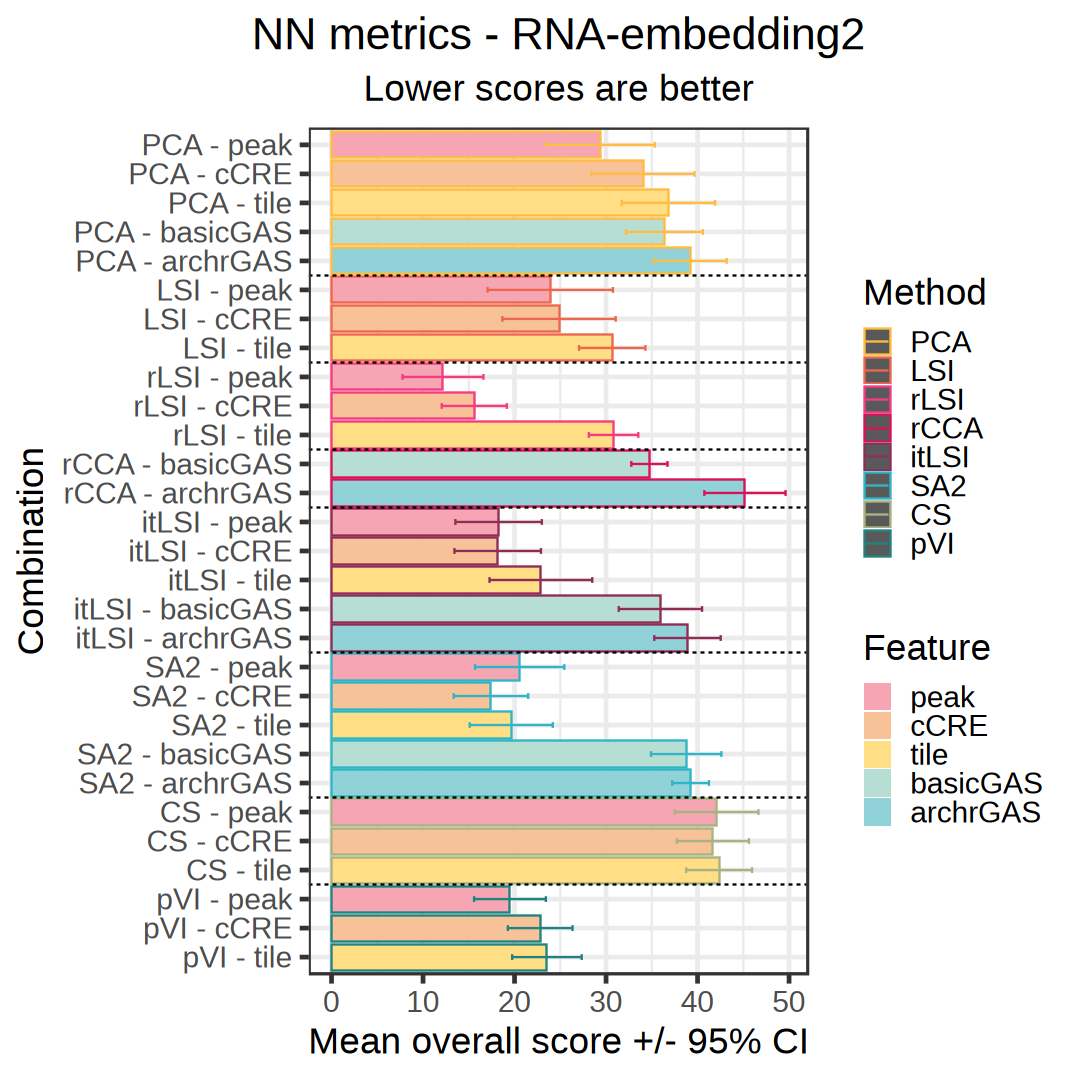

In [34]:
toPlot <- ST200_both_rank %>% 
        group_by(method,feature) %>%
        summarize(mean_score = mean(overall_score), stdErr=stdErr_calc(overall_score),.groups = 'drop') %>% 
        ungroup() %>% as.data.frame(stringsAsFactors=FALSE)
toPlot$combo <- paste(sep=' - ',toPlot$method,toPlot$feature)
toPlot$method <- factor(toPlot$method,levels=md_vec)
toPlot$feature <- factor(toPlot$feature,levels=ft_vec)
toPlot <- toPlot[order(toPlot$method,toPlot$feature),]
toPlot$combo <- factor(toPlot$combo,levels=rev(toPlot$combo))

options(repr.plot.height=9,repr.plot.width=9)
g <- ggplot(toPlot,aes(x=mean_score,y=combo,fill=feature,color=method)) + geom_bar(stat='identity',position='dodge') +
        theme_bw(base_size=22) + scale_fill_manual(values=feature_colors) + scale_color_manual(values=method_colors) +
        labs(x='Mean overall score +/- 95% CI',
             y='Combination',fill='Feature',color='Method',
             title=title_str, subtitle='Lower scores are better') +
        geom_hline(yintercept=c(3.5,6.5,11.5,16.5,18.5,21.5,24.5),linetype='dashed') +
        geom_errorbar(aes(xmin = mean_score-(stdErr*1.96),xmax = mean_score+(stdErr*1.96)),width=0.2) +
        theme(plot.title = element_text(hjust = 0.5),plot.subtitle = element_text(hjust = 0.5))
print(g)

if(!is.na(save_dir)){
    ggsave(file=paste(sep='',save_dir,file_str,'_linearMod_both_aggrFeat_barPlot',file_extension),
           plot=g,units='in',height=9,width=9,dpi=300)
}

### Linear Models - Separate

In [35]:
ST200_sep_res <- linearModel_sep(ST200_summary_df,ds_ref=ds_ref,ft_ref=ft_ref,md_ref=md_ref,hm_ref=hm_ref)
ST200_sep_rank <- ST200_sep_res$rank
ST200_sep_coeff <- ST200_sep_res$coeff


Call:  glm(formula = bio_score ~ ds + ft + md + hm, family = glm_family)

Coefficients:
(Intercept)   dsdataset2   dsdataset3   dsdataset4   dsdataset5       ftcCRE  
  2.493e+01    2.590e-15    3.186e-15    1.024e-15    1.602e-15   -6.100e+00  
     ftpeak   ftarchrGAS   ftbasicGAS         mdCS      mditLSI        mdPCA  
 -8.486e+00    2.669e+01    1.631e+01    3.307e+01   -9.204e+00    6.596e+00  
      mdpVI       mdrCCA       mdrLSI        mdSA2           hm  
  5.133e+00   -5.061e+00   -6.000e-01   -7.324e+00    6.552e-01  

Degrees of Freedom: 289 Total (i.e. Null);  273 Residual
Null Deviance:	    81270 
Residual Deviance: 17430 	AIC: 2047

Call:  glm(formula = batch_score ~ ds + ft + md + hm, family = glm_family)

Coefficients:
(Intercept)   dsdataset2   dsdataset3   dsdataset4   dsdataset5       ftcCRE  
  4.479e+01    4.658e-15    3.852e-15    3.934e-15    3.665e-15   -2.343e+00  
     ftpeak   ftarchrGAS   ftbasicGAS         mdCS      mditLSI        mdPCA  
 -1.871e+00   -

In [36]:
if(!is.na(save_dir)){
    write.table(ST200_sep_rank,file=paste(sep='',save_dir,file_str,'_linearMod_sep_ranks.txt'),
                sep='\t',row.names=FALSE,col.names=TRUE,quote=FALSE)
    write.table(ST200_sep_coeff,file=paste(sep='',save_dir,file_str,'_linearMod_sep_coefficients.txt'),
                sep='\t',row.names=FALSE,col.names=TRUE,quote=FALSE)
}

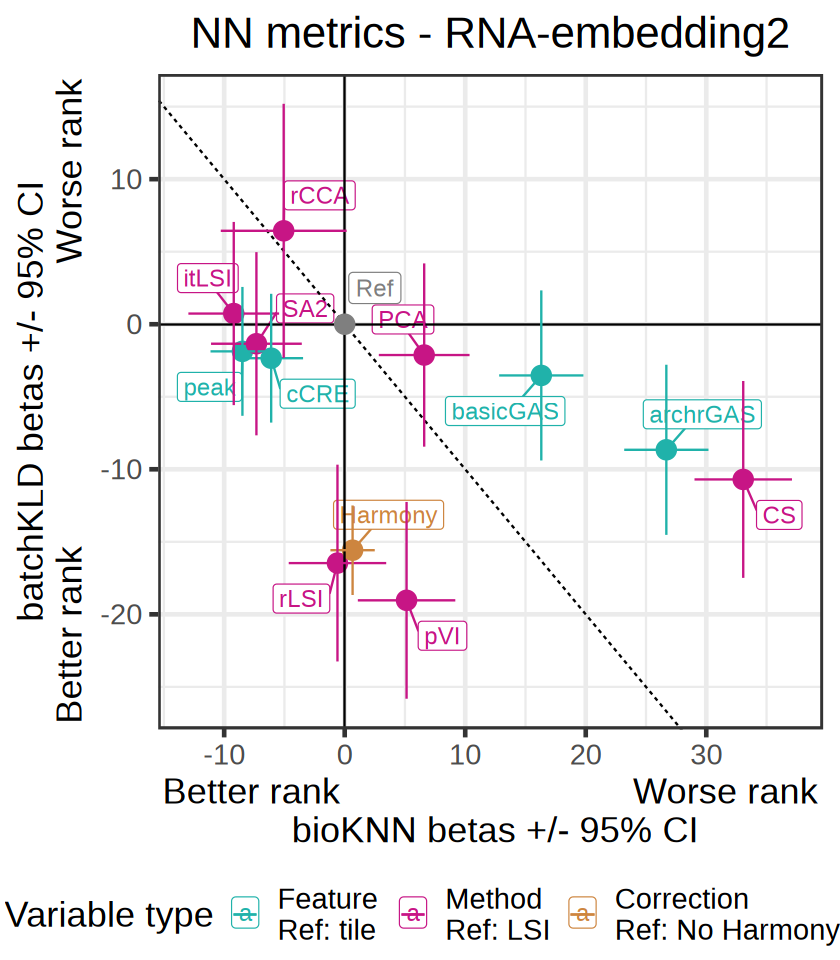

In [37]:
toPlot <- ST200_sep_coeff[grep('ft|md|hm',rownames(ST200_sep_coeff)),]

options(repr.plot.height=8,repr.plot.width=7)
g <- ggplot(toPlot,aes(x=bio_Estimate,y=batch_Estimate,label=varName,color=varType)) + geom_point(size=5) +
        theme_bw(base_size=21.5) + geom_label_repel(size=5,box.padding = 0.8) +
        labs(x=paste('Better rank                             Worse rank\n',bio_str,'betas +/- 95% CI'),
             y=paste(batch_str,'betas +/- 95% CI\nBetter rank                            Worse rank'),
             color='Variable type',title=title_str) +
        theme(plot.title=element_text(hjust = 0.5)) +
        scale_color_manual(labels = c('Feature'=paste(sep='','Feature\nRef: ',ft_ref), 
                                      'Method'=paste(sep='','Method\nRef: ',md_ref), 
                                      'Correction'='Correction\nRef: No Harmony'),
                           values = variable_type_colors) + 
        geom_vline(xintercept=0) + geom_hline(yintercept=0) + geom_abline(slope=-1,intercept=0,linetype='dashed') +
        geom_errorbar(aes(xmin = bio_Estimate-(bio_stdErr*1.96),xmax = bio_Estimate+(bio_stdErr*1.96)),width=0) +
        geom_errorbar(aes(ymin = batch_Estimate-(batch_stdErr*1.96),ymax = batch_Estimate+(batch_stdErr*1.96)),width=0) +
        annotate('point',x=0,y=0,colour=ref_color,size=5) + 
        annotate('label',x=2.5,y=2.5,label='Ref',colour=ref_color,size=5) +
        theme(legend.position = "bottom") + theme(legend.margin = margin(l = -0.17, unit = "npc"))
print(g)

if(!is.na(save_dir)){
    ggsave(file=paste(sep='',save_dir,file_str,'_linearMod_sep_ranks_scatterPlot',file_extension),
           plot=g,units='in',height=8,width=7,dpi=300)
}

## LISI metrics

In [60]:
title_str <- 'LISI metrics'
bio_str <- 'cLISI'
batch_str <- 'iLISI'
file_str <- 'LISI'

### Mean Scatterplots

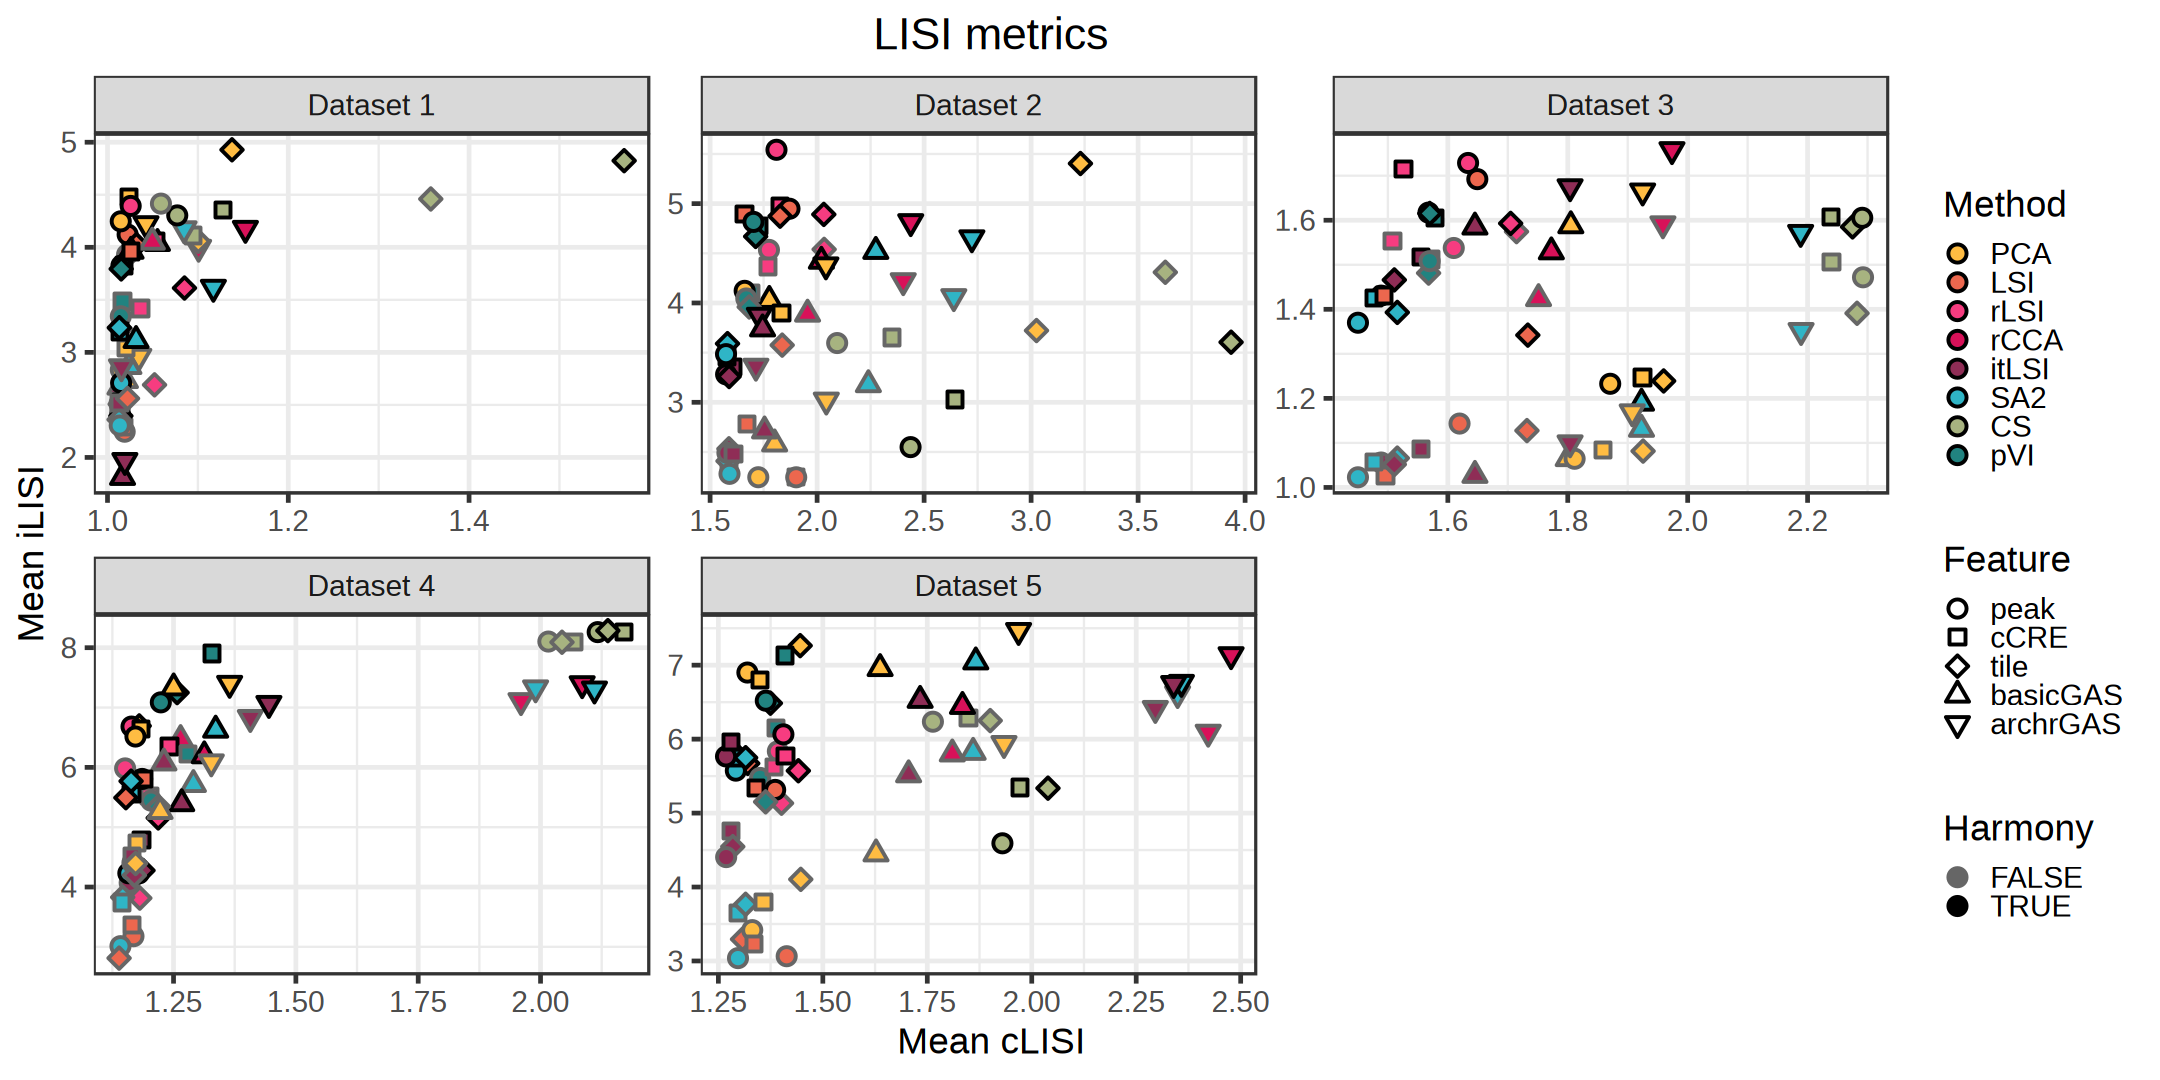

In [39]:
LISI_summary_df <- makeCompDF_wNA_woTR(perCell_metrics_df,'ATAC_iLISI','ATAC_cLISI',
                                        c('dataset','method','feature','Harmony'))

LISI_summary_df$dataset <- factor(LISI_summary_df$dataset,levels=ds_vec)
LISI_summary_df$feature <- factor(LISI_summary_df$feature,levels=ft_vec)
LISI_summary_df$method <- factor(LISI_summary_df$method,levels=md_vec)

options(repr.plot.height=9,repr.plot.width=18)
set.seed(0)
g <- ggplot(LISI_summary_df[sample(nrow(LISI_summary_df),nrow(LISI_summary_df)),],
            aes(x=CT_mean,y=sample_mean,fill=method,shape=feature,color=Harmony)) + 
        geom_point(size=4,stroke=1.25) + 
        theme_bw(base_size=22) + 
        labs(x=paste('Mean',bio_str),y=paste('Mean',batch_str),shape='Feature',fill='Method',title=title_str) +
        theme(plot.title=element_text(hjust = 0.5)) +
        scale_fill_manual(values=method_colors) + scale_shape_manual(values=feature_shapes) + 
        scale_color_manual(values=c('TRUE'='black','FALSE'=harmony_color)) + 
        guides(fill = guide_legend(override.aes = list(shape=21))) +
        facet_wrap(~dataset,scales = "free",labeller = labeller(dataset=dataset_labeller))
print(g)

if(!is.na(save_dir)){
    ggsave(file=paste(sep='',save_dir,file_str,'_mean_facetDataset_scatterPlot',file_extension),
           plot=g,units='in',height=9,width=18,dpi=300)
}

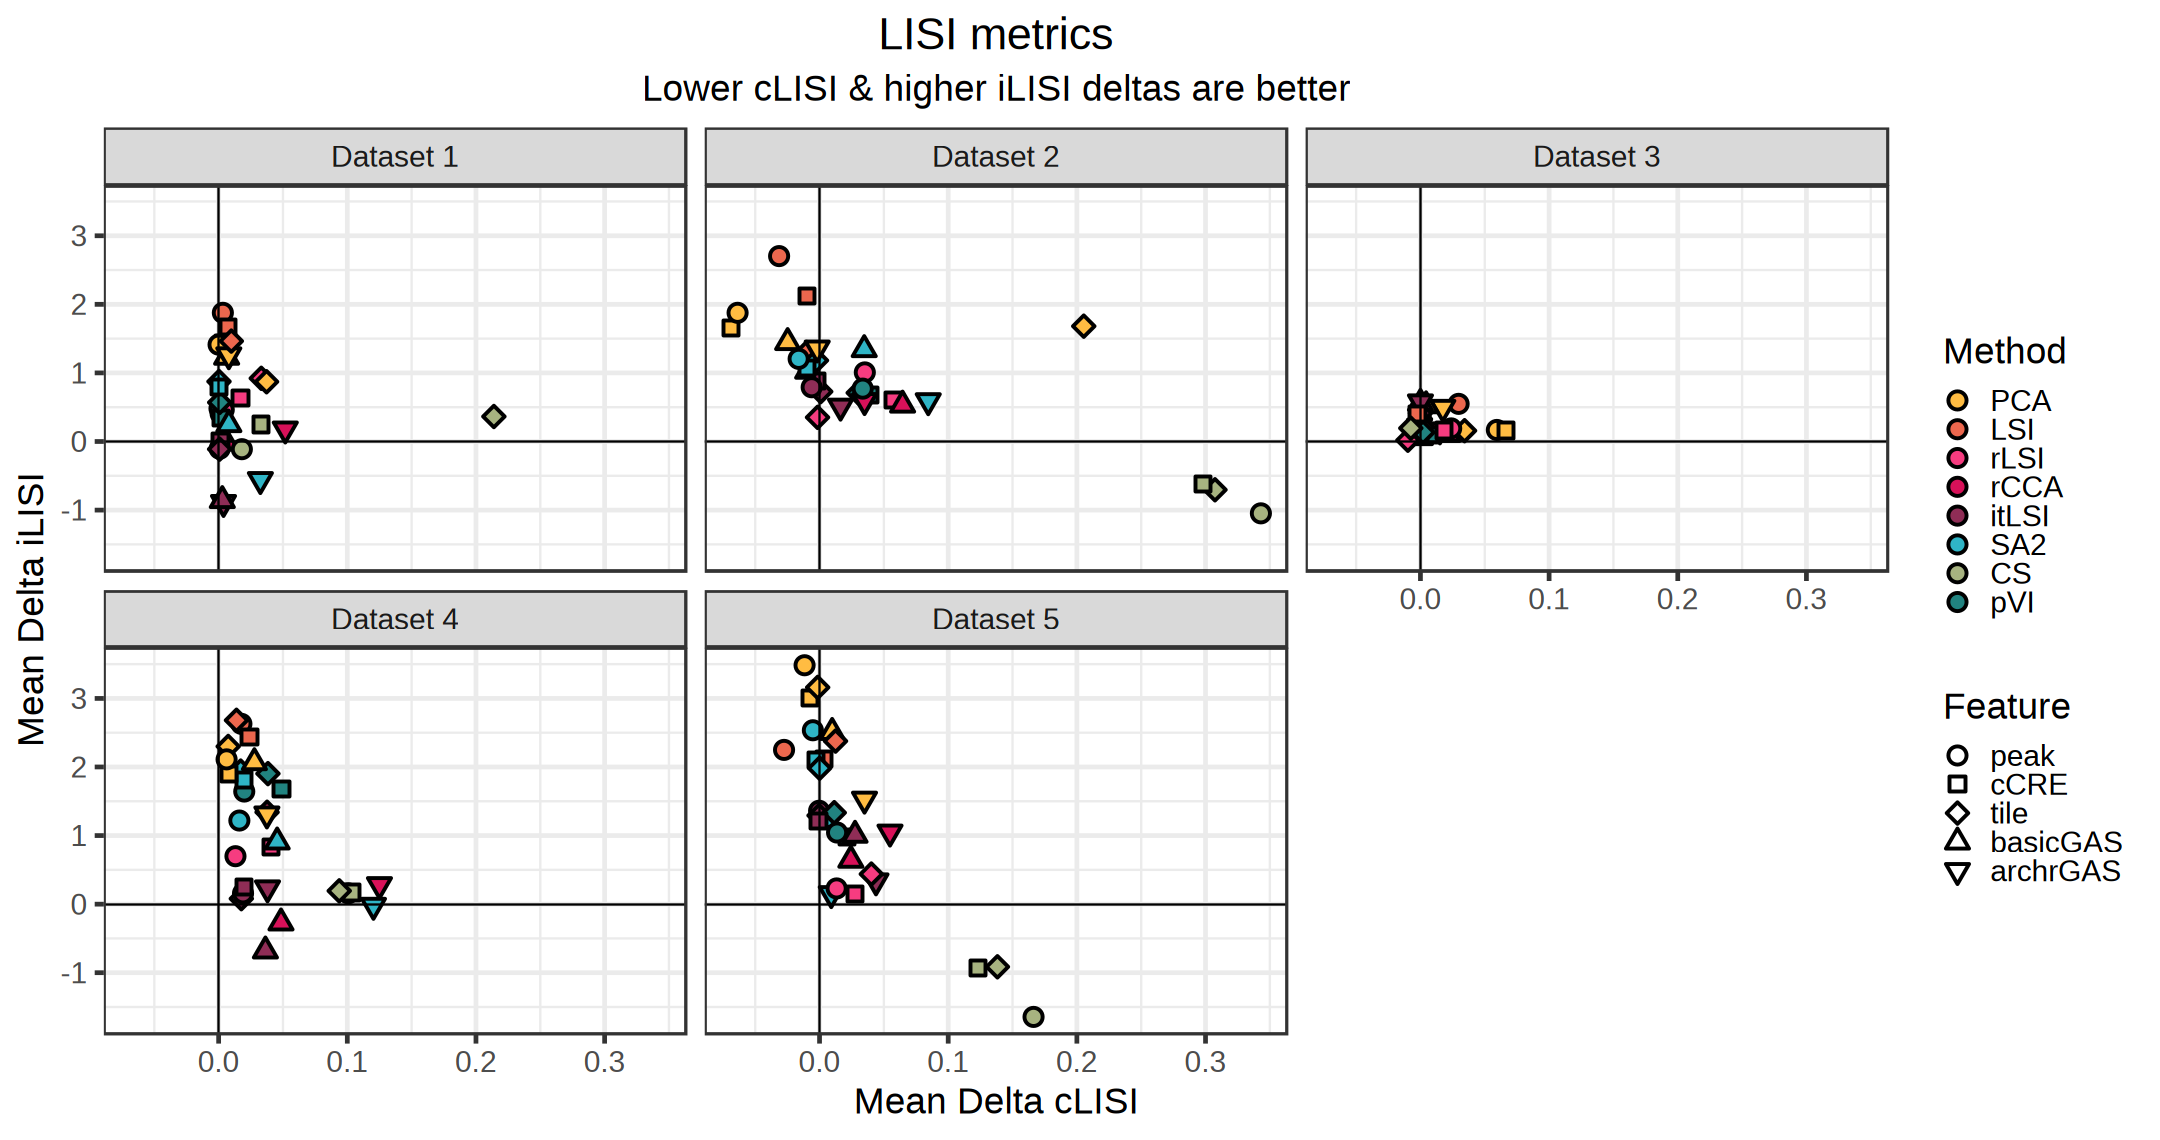

In [61]:
toPlot <- cbind(Harmony_perCell_metrics_df[,3:6],
                'delta_cLISI'=Harmony_perCell_metrics_df$ATAC_cLISI-noHarmony_perCell_metrics_df$ATAC_cLISI,
                'delta_iLISI'=Harmony_perCell_metrics_df$ATAC_iLISI-noHarmony_perCell_metrics_df$ATAC_iLISI,
                stringsAsFactors=FALSE)

toPlot <- makeCompDF_wNA_woTR(toPlot,'delta_iLISI','delta_cLISI',c('dataset','method','feature'))

toPlot$dataset <- factor(toPlot$dataset,levels=ds_vec)
toPlot$feature <- factor(toPlot$feature,levels=ft_vec)
toPlot$method <- factor(toPlot$method,levels=md_vec)

options(repr.plot.height=9.5,repr.plot.width=18)
set.seed(0)
g <- ggplot(toPlot[sample(nrow(toPlot),nrow(toPlot)),],
            aes(x=CT_mean,y=sample_mean,fill=method,shape=feature)) + 
        geom_point(size=4,stroke=1.25) + 
        theme_bw(base_size=22) + 
        labs(x=paste('Mean Delta',bio_str),y=paste('Mean Delta',batch_str),shape='Feature',fill='Method',
             title=title_str,subtitle='Lower cLISI & higher iLISI deltas are better') +
        theme(plot.title=element_text(hjust = 0.5),plot.subtitle=element_text(hjust = 0.5)) +
        scale_fill_manual(values=method_colors) + scale_shape_manual(values=feature_shapes) +
        guides(fill = guide_legend(override.aes = list(shape=21))) +
        geom_vline(xintercept=0) + geom_hline(yintercept=0) + 
        facet_wrap(~dataset,labeller = labeller(dataset=dataset_labeller))
print(g)

if(!is.na(save_dir)){
    ggsave(file=paste(sep='',save_dir,file_str,'_meanHarmonyDelta_facetDataset_scatterPlot',file_extension),
           plot=g,units='in',height=9.5,width=18,dpi=300)
}

In [41]:
if(!is.na(save_dir)){
    saveRDS(LISI_summary_df,paste(sep='',save_dir,file_str,'_summary.rds'))
}

### Linear Models - Combined

In [42]:
LISI_both_res <- linearModel_both(LISI_summary_df,ds_ref=ds_ref,ft_ref=ft_ref,md_ref=md_ref,hm_ref=hm_ref,
                                  batch_lowScore_good=FALSE)
LISI_both_rank <- LISI_both_res$rank
LISI_both_coeff <- LISI_both_res$coeff


Call:  glm(formula = overall_score ~ ds + ft + md + hm, family = glm_family)

Coefficients:
(Intercept)   dsdataset2   dsdataset3   dsdataset4   dsdataset5       ftcCRE  
  3.296e+01    1.207e-15    1.746e-15    8.257e-16    9.436e-16   -2.334e+00  
     ftpeak   ftarchrGAS   ftbasicGAS         mdCS      mditLSI        mdPCA  
 -3.303e+00    8.549e+00    6.529e+00    1.011e+01   -5.682e+00   -5.338e-01  
      mdpVI       mdrCCA       mdrLSI        mdSA2           hm  
 -6.433e+00   -3.724e+00   -2.407e+00   -4.338e+00   -4.477e+00  

Degrees of Freedom: 289 Total (i.e. Null);  273 Residual
Null Deviance:	    22690 
Residual Deviance: 11830 	AIC: 1934


In [43]:
if(!is.na(save_dir)){
    write.table(LISI_both_rank,file=paste(sep='',save_dir,file_str,'_linearMod_both_ranks.txt'),
                sep='\t',row.names=FALSE,col.names=TRUE,quote=FALSE)
    write.table(LISI_both_coeff,file=paste(sep='',save_dir,file_str,'_linearMod_both_coefficients.txt'),
                sep='\t',row.names=FALSE,col.names=TRUE,quote=FALSE)
}

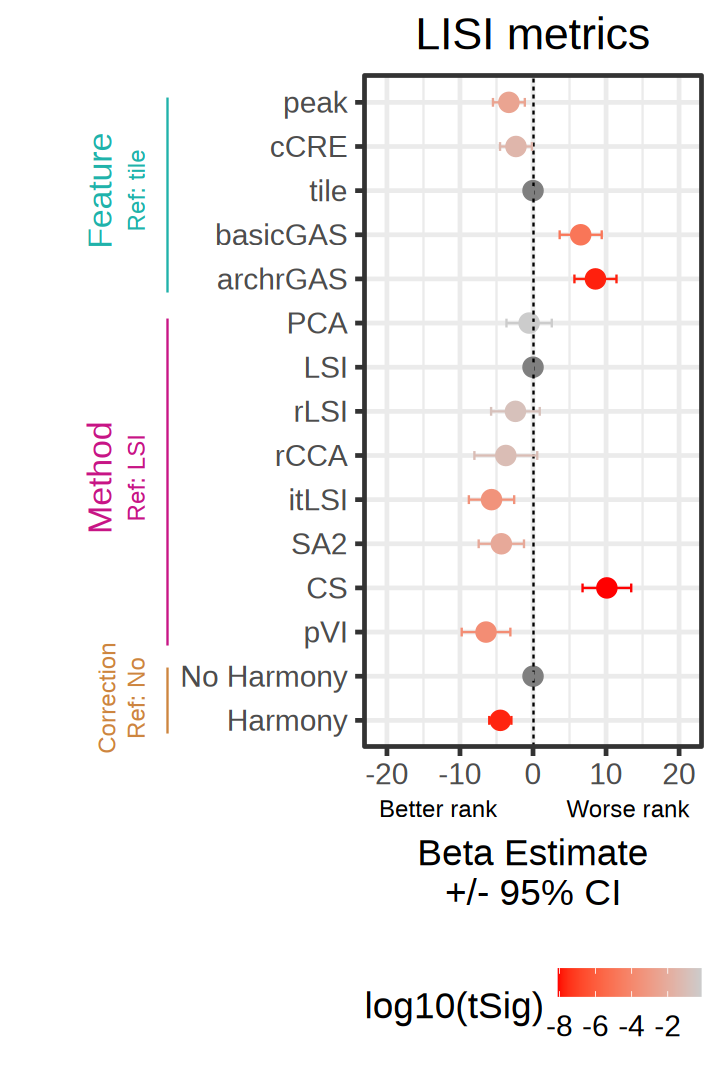

In [44]:
options(repr.plot.height=9,repr.plot.width=8)

toAdd <- data.frame('Estimate'=rep(0,3),'stdErr'=rep(0,3),'tVal'=rep(0,3),'tSig'=rep(NA,3),
                    'varName'=c(ft_ref,md_ref,'No Harmony'),
                    row.names=c(paste(sep='','ft',ft_ref),paste(sep='','md',md_ref),'nohm'),stringsAsFactors=FALSE)

toPlot <- rbind(LISI_both_coeff[grep('ft|md|hm',rownames(LISI_both_coeff)),],toAdd)
toPlot$varName <- factor(toPlot$varName,levels=rev(c(ft_vec,md_vec,'No Harmony','Harmony')))

options(repr.plot.height=9,repr.plot.width=6)
g <- ggplot(toPlot,aes(x=Estimate,y=varName,color=log10(tSig))) + geom_point(size=5) +
        theme_bw(base_size=22) + scale_color_gradient(low='red',high='grey80') +
        labs(x='\nBeta Estimate\n+/- 95% CI',y='\n\n\n',title=title_str) + 
        theme(plot.title=element_text(hjust = 0.5)) +
        geom_vline(xintercept=0,linetype='dashed') + 
        geom_errorbar(aes(xmin = Estimate-(stdErr*1.96),xmax = Estimate+(stdErr*1.96)),width=0.2) +
        annotate('text', y = c(6.5,13), x=-52, angle = 90,size=5,
                 label = c(paste(sep='','Ref: ',md_ref,'\n'),paste(sep='','Ref: ',ft_ref,'\n')),
                 color=variable_type_colors[c('Method','Feature')]) +
        annotate('text', y = c(6.5,13), x=-56, label = c('Method\n','Feature\n'),angle = 90,size=7,
                 color=variable_type_colors[c('Method','Feature')]) +
        annotate('text', y = 1.5, x=-52, label = 'Ref: No\n',angle = 90,size=5,color=variable_type_colors['Correction']) +
        annotate('text', y = 1.5, x=-56, label = 'Correction\n',angle = 90,size=5,
                 color=variable_type_colors['Correction']) +
        annotate('segment',y=2.7,yend=10.1,x=-50,color=variable_type_colors['Method']) + 
        annotate('segment',y=10.7,yend=15.1,x=-50,color=variable_type_colors['Feature']) + 
        annotate('segment',y=0.7,yend=2.2,x=-50,color=variable_type_colors['Correction']) +
        annotate('text', x = c(-13,13), y=-1, label = c('Better rank','Worse rank'),size=5) +
        coord_cartesian(xlim = c(-21, 21), ylim=c(1,15), clip = "off") +
        theme(legend.position = "bottom") 
print(g)

if(!is.na(save_dir)){
    ggsave(file=paste(sep='',save_dir,file_str,'_linearMod_both_ranks',file_extension),
           plot=g,units='in',height=9,width=6,dpi=300)
}

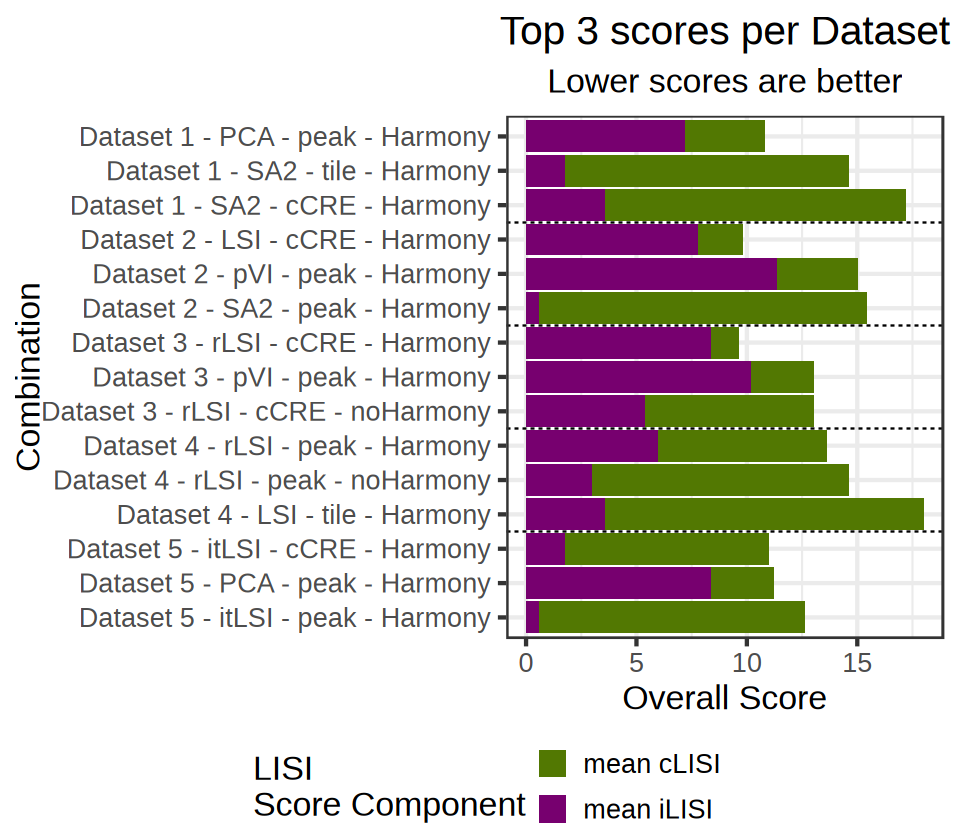

In [45]:
for(ds in sort(unique(LISI_both_rank$dataset))){
    
    ll <- LISI_both_rank[which(LISI_both_rank$dataset==ds),]
    ll <- head(ll[order(ll$overall_score,decreasing=FALSE),],n=3)
    
    if(ds==sort(unique(LISI_both_rank$dataset))[1]) {
        toPlot <- ll
    } else {
        toPlot <- rbind(toPlot,ll)
    }
}


toPlot$bio_score <- toPlot$mean_bio_rank * 0.6
toPlot$batch_score <- toPlot$mean_batch_rank * 0.4
if(!identical(toPlot$bio_score+toPlot$batch_score,toPlot$overall_score)) stop('score issue')
toPlot$combo <- paste(sep=' - ',dataset_labeller[toPlot$dataset], toPlot$method, toPlot$feature, toPlot$Harmony)
ord <- toPlot$combo

toPlot <- toPlot[,c('combo','bio_score','batch_score','overall_score')]
toPlot <- tidyr::gather(toPlot,'score_comp','score_val',all_of(c('bio_score','batch_score')))
toPlot$combo <- factor(toPlot$combo, levels=rev(ord))

options(repr.plot.height=7,repr.plot.width=8)
g <- ggplot(toPlot,aes(x=score_val,y=combo,fill=score_comp)) + geom_bar(position="stack", stat="identity") + 
        theme_bw(base_size=20) + theme(plot.title = element_text(hjust = 0.5),plot.subtitle = element_text(hjust = 0.5)) +
        labs(x='Overall Score', y='Combination', fill=paste(sep='\n',sub(' metrics','',title_str),'Score Component'), 
             title = 'Top 3 scores per Dataset', subtitle='Lower scores are better') +
        geom_hline(yintercept=c(3.5,6.5,9.5,12.5),linetype='dashed') +
        theme(legend.position = "bottom") + theme(legend.margin = margin(l = -0.6, unit = "npc")) + 
        guides(fill=guide_legend(nrow=2,byrow=TRUE)) + 
        scale_fill_manual(labels = c(paste("mean",bio_str), paste("mean",batch_str)),
                          values = c(batch_color, bio_color)) 
print(g)

if(!is.na(save_dir)){
    ggsave(file=paste(sep='',save_dir,file_str,'_linearMod_both_top3_barPlot',file_extension),
           plot=g,units='in',height=7,width=8,dpi=300)
}

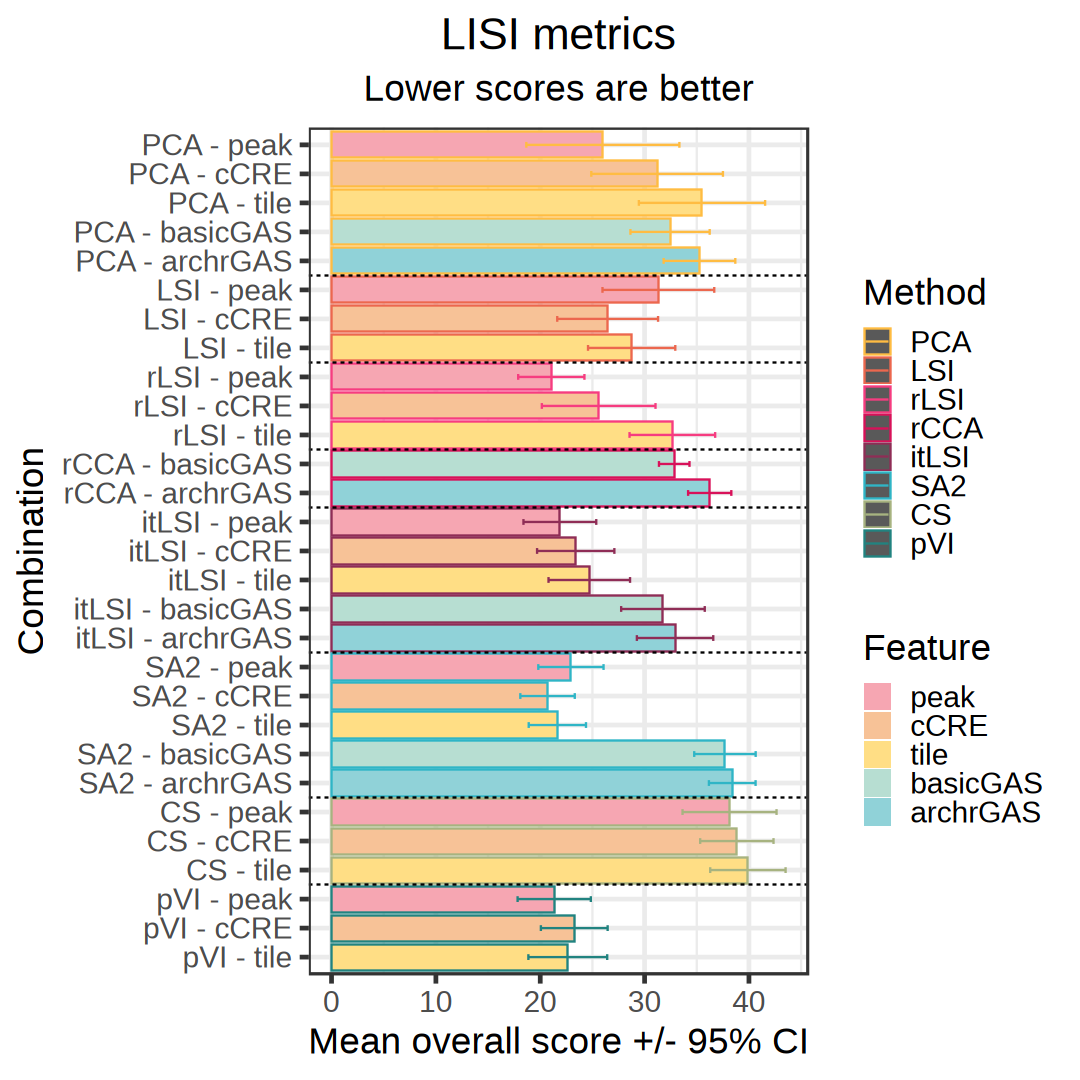

In [46]:
toPlot <- LISI_both_rank %>% 
        group_by(method,feature) %>%
        summarize(mean_score = mean(overall_score), stdErr=stdErr_calc(overall_score),.groups = 'drop') %>% 
        ungroup() %>% as.data.frame(stringsAsFactors=FALSE)
toPlot$combo <- paste(sep=' - ',toPlot$method,toPlot$feature)
toPlot$method <- factor(toPlot$method,levels=md_vec)
toPlot$feature <- factor(toPlot$feature,levels=ft_vec)
toPlot <- toPlot[order(toPlot$method,toPlot$feature),]
toPlot$combo <- factor(toPlot$combo,levels=rev(toPlot$combo))

options(repr.plot.height=9,repr.plot.width=9)
g <- ggplot(toPlot,aes(x=mean_score,y=combo,fill=feature,color=method)) + geom_bar(stat='identity',position='dodge') +
        theme_bw(base_size=22) + scale_fill_manual(values=feature_colors) + scale_color_manual(values=method_colors) +
        labs(x='Mean overall score +/- 95% CI',
             y='Combination',fill='Feature',color='Method',
             title=title_str, subtitle='Lower scores are better') +
        geom_hline(yintercept=c(3.5,6.5,11.5,16.5,18.5,21.5,24.5),linetype='dashed') +
        geom_errorbar(aes(xmin = mean_score-(stdErr*1.96),xmax = mean_score+(stdErr*1.96)),width=0.2) +
        theme(plot.title = element_text(hjust = 0.5),plot.subtitle = element_text(hjust = 0.5))
print(g)

if(!is.na(save_dir)){
    ggsave(file=paste(sep='',save_dir,file_str,'_linearMod_both_aggrFeat_barPlot',file_extension),
           plot=g,units='in',height=9,width=9,dpi=300)
}

### Linear Models - Separate

In [47]:
LISI_sep_res <- linearModel_sep(LISI_summary_df,ds_ref=ds_ref,ft_ref=ft_ref,md_ref=md_ref,hm_ref=hm_ref,
                                batch_lowScore_good=FALSE)
LISI_sep_rank <- LISI_sep_res$rank
LISI_sep_coeff <- LISI_sep_res$coeff


Call:  glm(formula = bio_score ~ ds + ft + md + hm, family = glm_family)

Coefficients:
(Intercept)   dsdataset2   dsdataset3   dsdataset4   dsdataset5       ftcCRE  
  2.469e+01    1.230e-15    2.330e-15   -2.147e-16   -5.401e-17   -3.386e+00  
     ftpeak   ftarchrGAS   ftbasicGAS         mdCS      mditLSI        mdPCA  
 -5.829e+00    2.606e+01    1.581e+01    2.923e+01   -1.363e+01    1.549e+00  
      mdpVI       mdrCCA       mdrLSI        mdSA2           hm  
  2.333e-01   -8.778e-01    6.300e+00   -9.551e+00    2.703e+00  

Degrees of Freedom: 289 Total (i.e. Null);  273 Residual
Null Deviance:	    81270 
Residual Deviance: 24500 	AIC: 2146

Call:  glm(formula = batch_score ~ ds + ft + md + hm, family = glm_family)

Coefficients:
(Intercept)   dsdataset2   dsdataset3   dsdataset4   dsdataset5       ftcCRE  
  4.538e+01    3.646e-15    2.963e-15    3.005e-15    2.938e-15   -7.571e-01  
     ftpeak   ftarchrGAS   ftbasicGAS         mdCS      mditLSI        mdPCA  
  4.857e-01   -

In [48]:
if(!is.na(save_dir)){
    write.table(LISI_sep_rank,file=paste(sep='',save_dir,file_str,'_linearMod_sep_ranks.txt'),
                sep='\t',row.names=FALSE,col.names=TRUE,quote=FALSE)
    write.table(LISI_sep_coeff,file=paste(sep='',save_dir,file_str,'_linearMod_sep_coefficients.txt'),
                sep='\t',row.names=FALSE,col.names=TRUE,quote=FALSE)
}

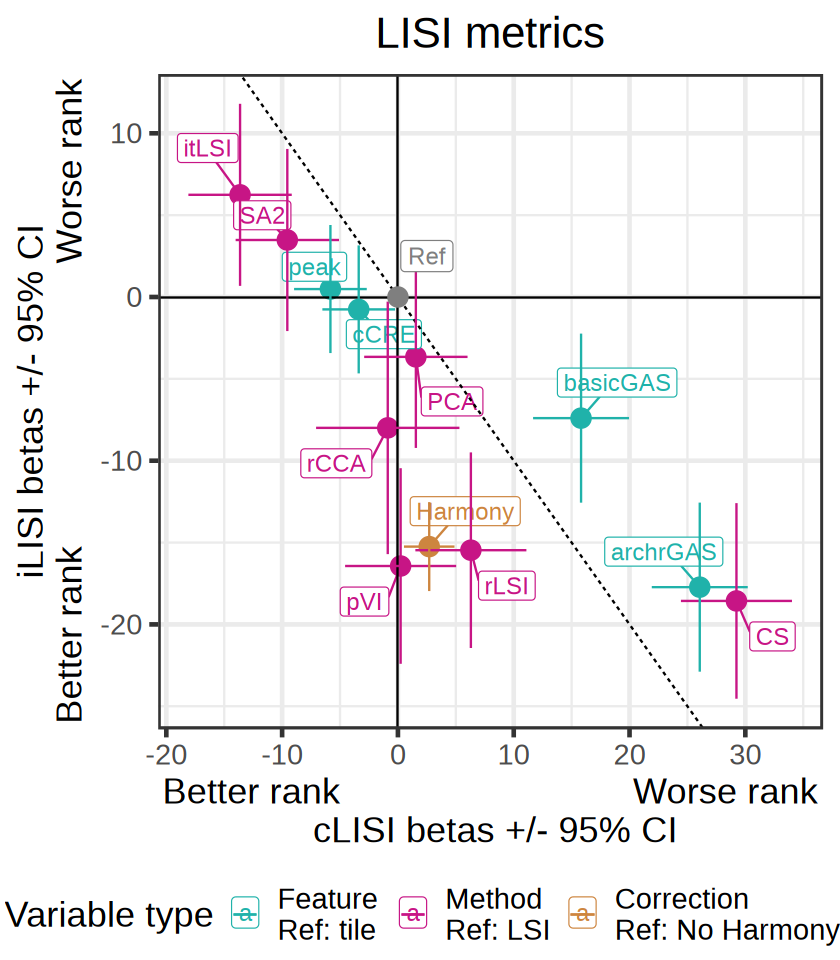

In [49]:
toPlot <- LISI_sep_coeff[grep('ft|md|hm',rownames(LISI_sep_coeff)),]

options(repr.plot.height=8,repr.plot.width=7)
g <- ggplot(toPlot,aes(x=bio_Estimate,y=batch_Estimate,label=varName,color=varType)) + geom_point(size=5) +
        theme_bw(base_size=21.5) + geom_label_repel(size=5,box.padding = 0.8) +
        labs(x=paste('Better rank                             Worse rank\n',bio_str,'betas +/- 95% CI'),
             y=paste(batch_str,'betas +/- 95% CI\nBetter rank                            Worse rank'),
             color='Variable type',title=title_str) +
        theme(plot.title=element_text(hjust = 0.5)) +
        scale_color_manual(labels = c('Feature'=paste(sep='','Feature\nRef: ',ft_ref), 
                                      'Method'=paste(sep='','Method\nRef: ',md_ref), 
                                      'Correction'='Correction\nRef: No Harmony'),
                           values = variable_type_colors) + 
        geom_vline(xintercept=0) + geom_hline(yintercept=0) + geom_abline(slope=-1,intercept=0,linetype='dashed') +
        geom_errorbar(aes(xmin = bio_Estimate-(bio_stdErr*1.96),xmax = bio_Estimate+(bio_stdErr*1.96)),width=0) +
        geom_errorbar(aes(ymin = batch_Estimate-(batch_stdErr*1.96),ymax = batch_Estimate+(batch_stdErr*1.96)),width=0) +
        annotate('point',x=0,y=0,colour=ref_color,size=5) + 
        annotate('label',x=2.5,y=2.5,label='Ref',colour=ref_color,size=5) +
        theme(legend.position = "bottom") + theme(legend.margin = margin(l = -0.17, unit = "npc"))
print(g)

if(!is.na(save_dir)){
    ggsave(file=paste(sep='',save_dir,file_str,'_linearMod_sep_ranks_scatterPlot',file_extension),
           plot=g,units='in',height=8,width=7,dpi=300)
}

## Compare metrics

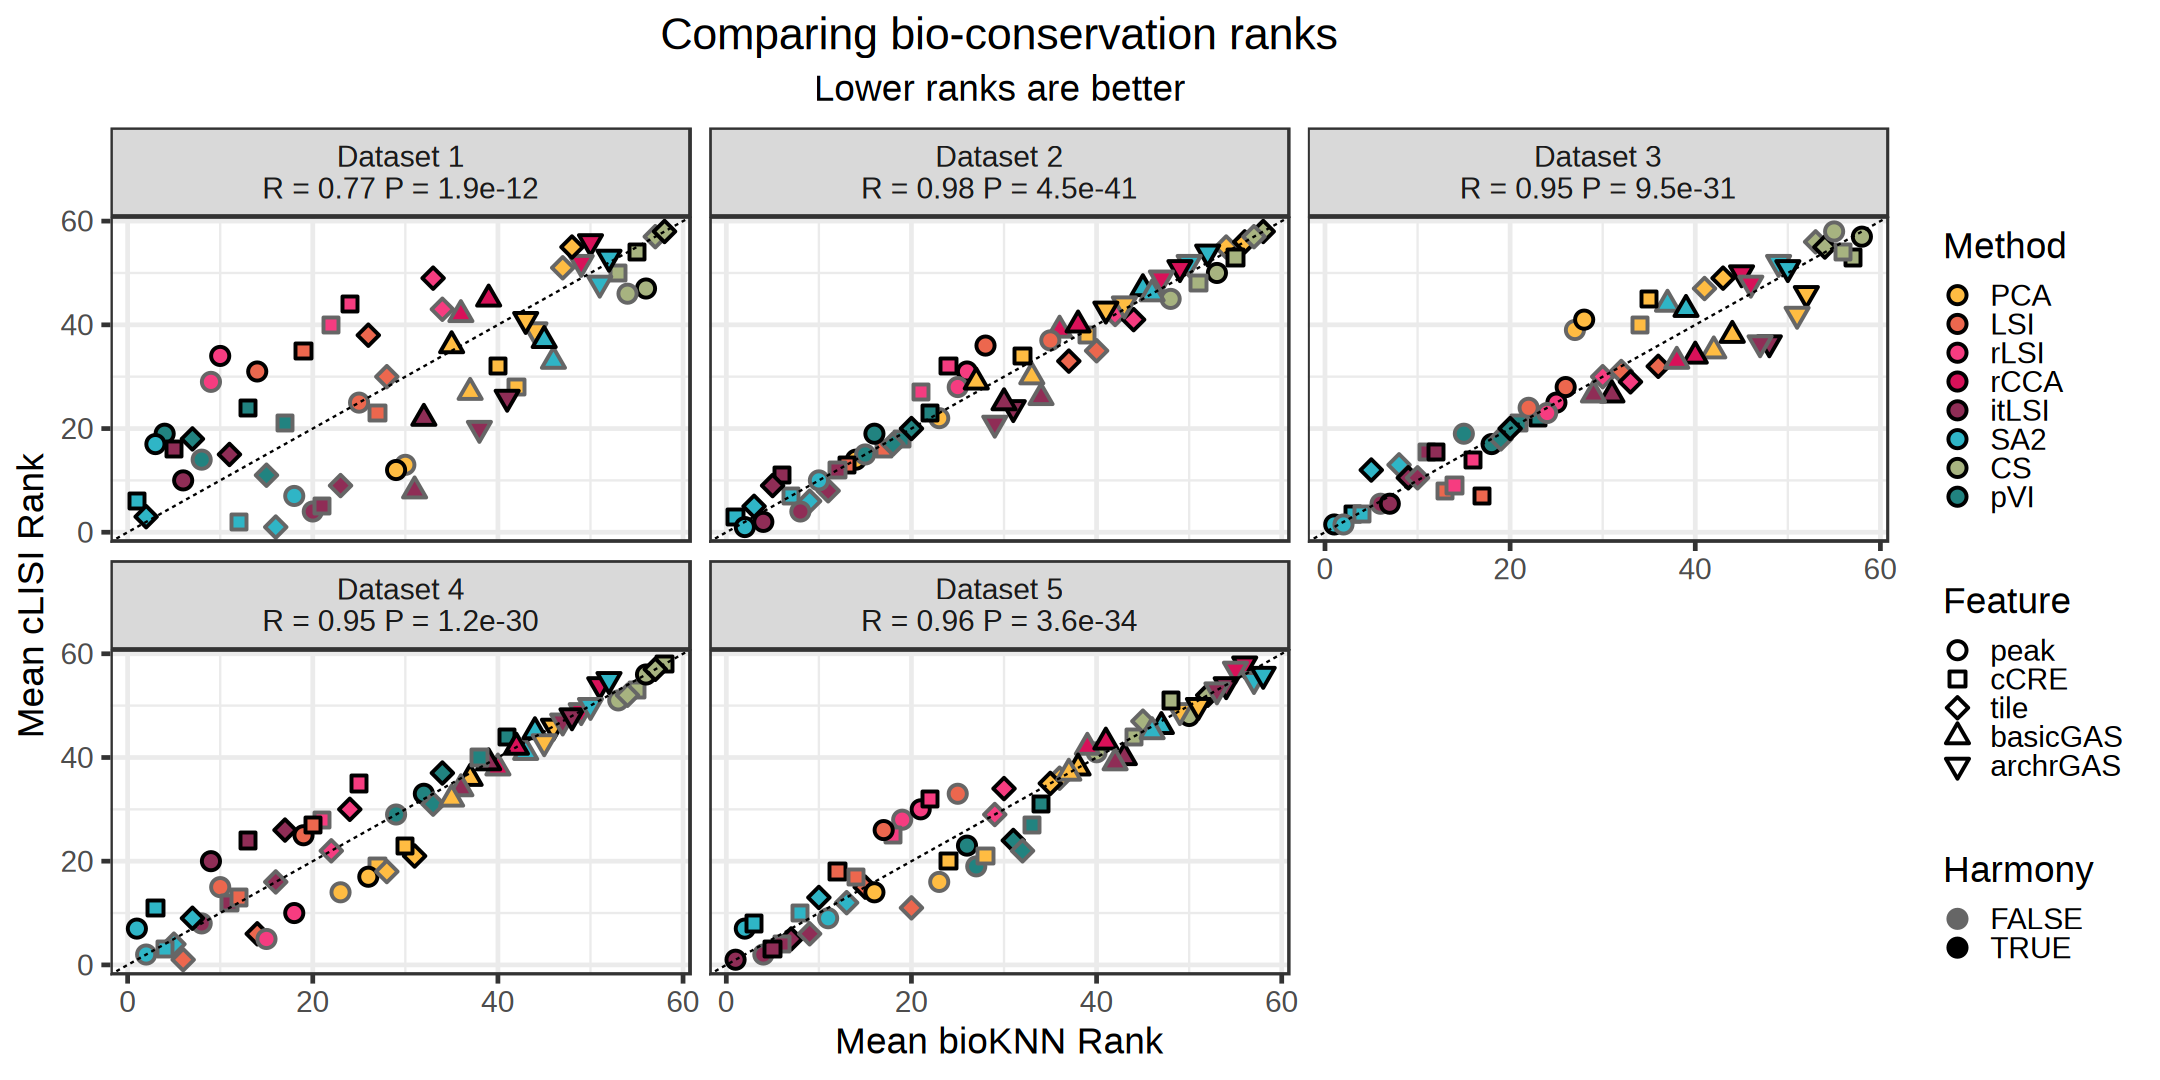

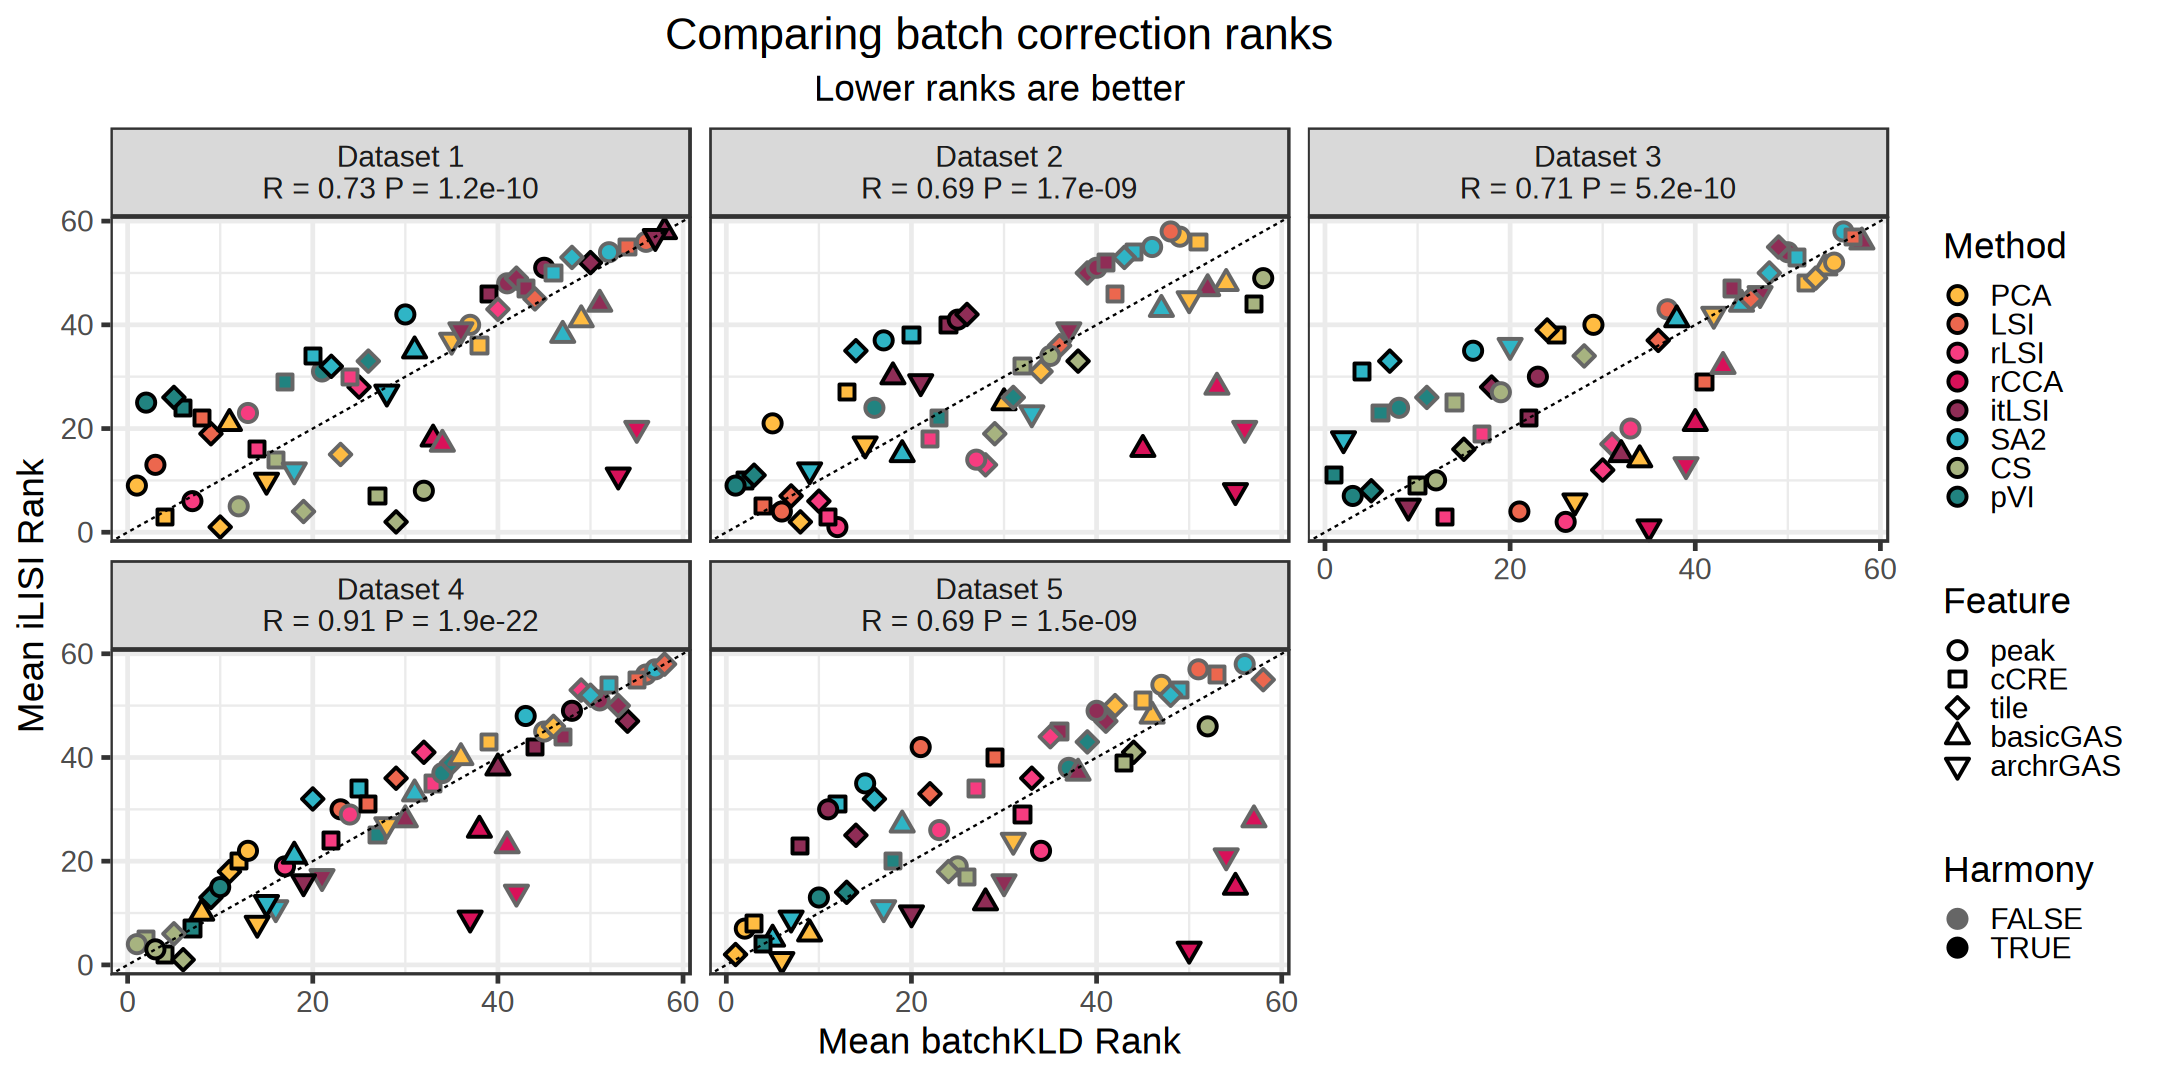

In [50]:
if(!identical(PH200_both_rank[,1:4],LISI_both_rank[,1:4])) stop('pipelines do not match')
if(!identical(colnames(PH200_both_rank),colnames(LISI_both_rank))) stop('colnames do not match')

toPlot <- cbind(PH200_both_rank[,1:3],'Harmony'=ifelse(PH200_both_rank$Harmony=='Harmony',TRUE,FALSE),
                'mKNN_meanRank'=PH200_both_rank$mean_bio_rank,'cLISI_meanRank'=LISI_both_rank$mean_bio_rank,
                'lsKLD_meanRank'=PH200_both_rank$mean_batch_rank,'iLISI_meanRank'=LISI_both_rank$mean_batch_rank)

bio_corr_vec <- c()
batch_corr_vec <- c()
for(ds in sort(unique(toPlot$dataset))){
    ll <- toPlot[which(toPlot$dataset==ds),]
    bio_corr <- cor.test(ll$mKNN_meanRank,ll$cLISI_meanRank,method='pearson')
    batch_corr <- cor.test(ll$lsKLD_meanRank,ll$iLISI_meanRank,method='pearson')
    
    bio_corr_vec <- c(bio_corr_vec,paste(sep='',dataset_labeller[ds],'\nR = ',round(bio_corr$estimate,2),
                                                    ' P = ',signif(bio_corr$p.value,2)))
    batch_corr_vec <- c(batch_corr_vec,paste(sep='',dataset_labeller[ds],'\nR = ',round(batch_corr$estimate,2),
                                                    ' P = ',signif(batch_corr$p.value,2)))
}
names(bio_corr_vec) <- sort(unique(toPlot$dataset))
names(batch_corr_vec) <- sort(unique(toPlot$dataset))

toPlot$dataset <- factor(toPlot$dataset,levels=ds_vec)
toPlot$feature <- factor(toPlot$feature,levels=ft_vec)
toPlot$method <- factor(toPlot$method,levels=md_vec)

options(repr.plot.height=9,repr.plot.width=18)
set.seed(0)
g <- ggplot(toPlot[sample(nrow(toPlot),nrow(toPlot)),],
            aes(x=mKNN_meanRank,y=cLISI_meanRank,fill=method,shape=feature,color=Harmony)) + 
        geom_point(size=4,stroke=1.25) + 
        theme_bw(base_size=22) +
        labs(x='Mean bioKNN Rank',y='Mean cLISI Rank',shape='Feature',fill='Method',
             title='Comparing bio-conservation ranks',subtitle='Lower ranks are better') +
        theme(plot.title=element_text(hjust = 0.5),plot.subtitle=element_text(hjust = 0.5)) +
        scale_fill_manual(values=method_colors) + scale_shape_manual(values=feature_shapes) + 
        scale_color_manual(values=c('TRUE'='black','FALSE'=harmony_color)) + 
        guides(fill = guide_legend(override.aes = list(shape=21))) +
        facet_wrap(~dataset,labeller = labeller(dataset=bio_corr_vec)) +
        geom_abline(slope=1,intercept=0,linetype='dashed')
print(g)

if(!is.na(save_dir)){
    ggsave(file=paste(sep='',save_dir,'bioComp_meanRank_facetDataset_scatterPlot',file_extension),
           plot=g,units='in',height=9,width=18,dpi=300)
}

options(repr.plot.height=9,repr.plot.width=18)
set.seed(0)
g <- ggplot(toPlot[sample(nrow(toPlot),nrow(toPlot)),],
            aes(x=lsKLD_meanRank,y=iLISI_meanRank,fill=method,shape=feature,color=Harmony)) + 
        geom_point(size=4,stroke=1.25) + 
        theme_bw(base_size=22) + 
        labs(x='Mean batchKLD Rank',y='Mean iLISI Rank',shape='Feature',fill='Method',
             title='Comparing batch correction ranks',subtitle='Lower ranks are better') +
        theme(plot.title=element_text(hjust = 0.5),plot.subtitle=element_text(hjust = 0.5)) +
        scale_fill_manual(values=method_colors) + scale_shape_manual(values=feature_shapes) + 
        scale_color_manual(values=c('TRUE'='black','FALSE'=harmony_color)) + 
        guides(fill = guide_legend(override.aes = list(shape=21))) +
        facet_wrap(~dataset,labeller = labeller(dataset=batch_corr_vec)) +
        geom_abline(slope=1,intercept=0,linetype='dashed')
print(g)

if(!is.na(save_dir)){
    ggsave(file=paste(sep='',save_dir,'batchComp_meanRank_facetDataset_scatterPlot',file_extension),
           plot=g,units='in',height=9,width=18,dpi=300)
}

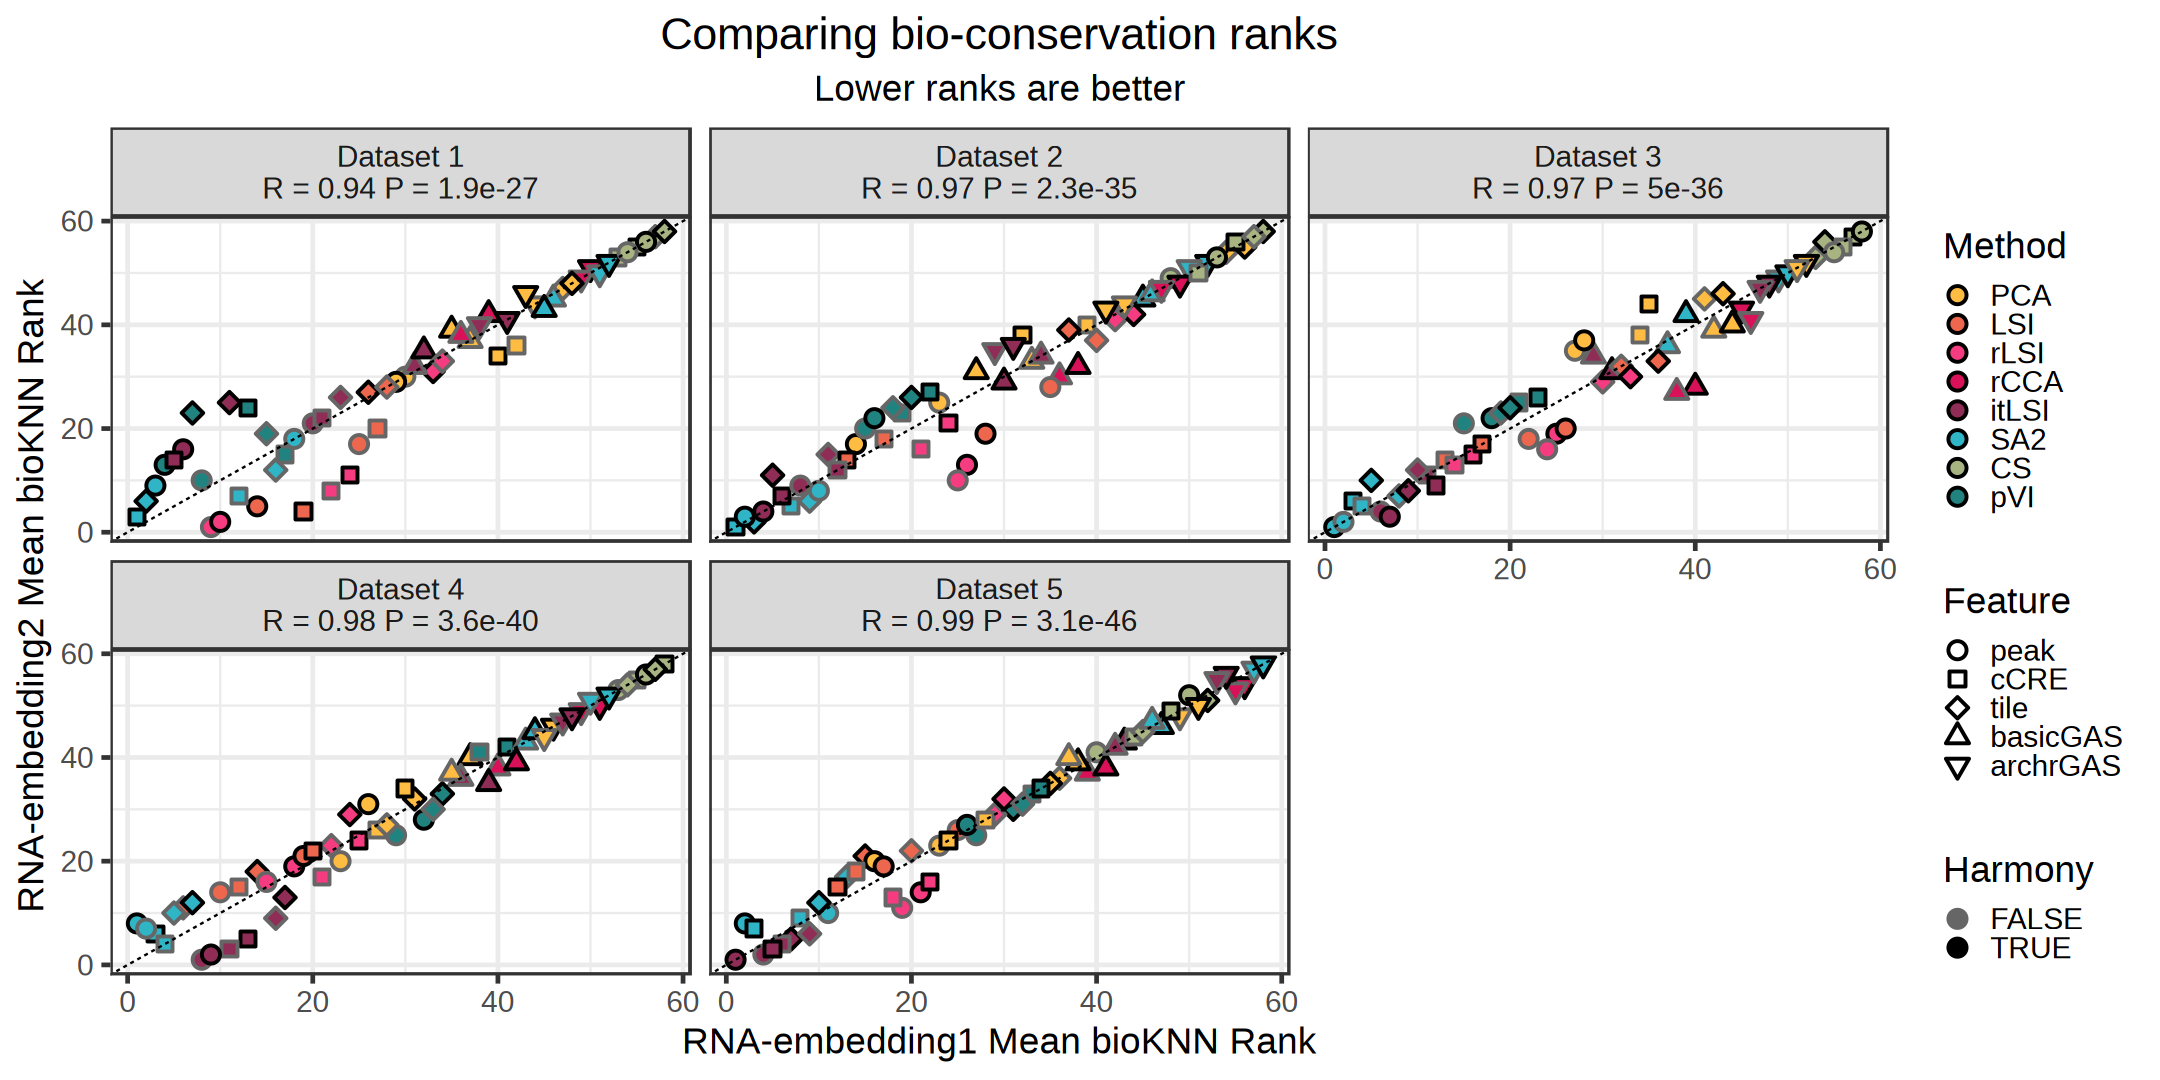

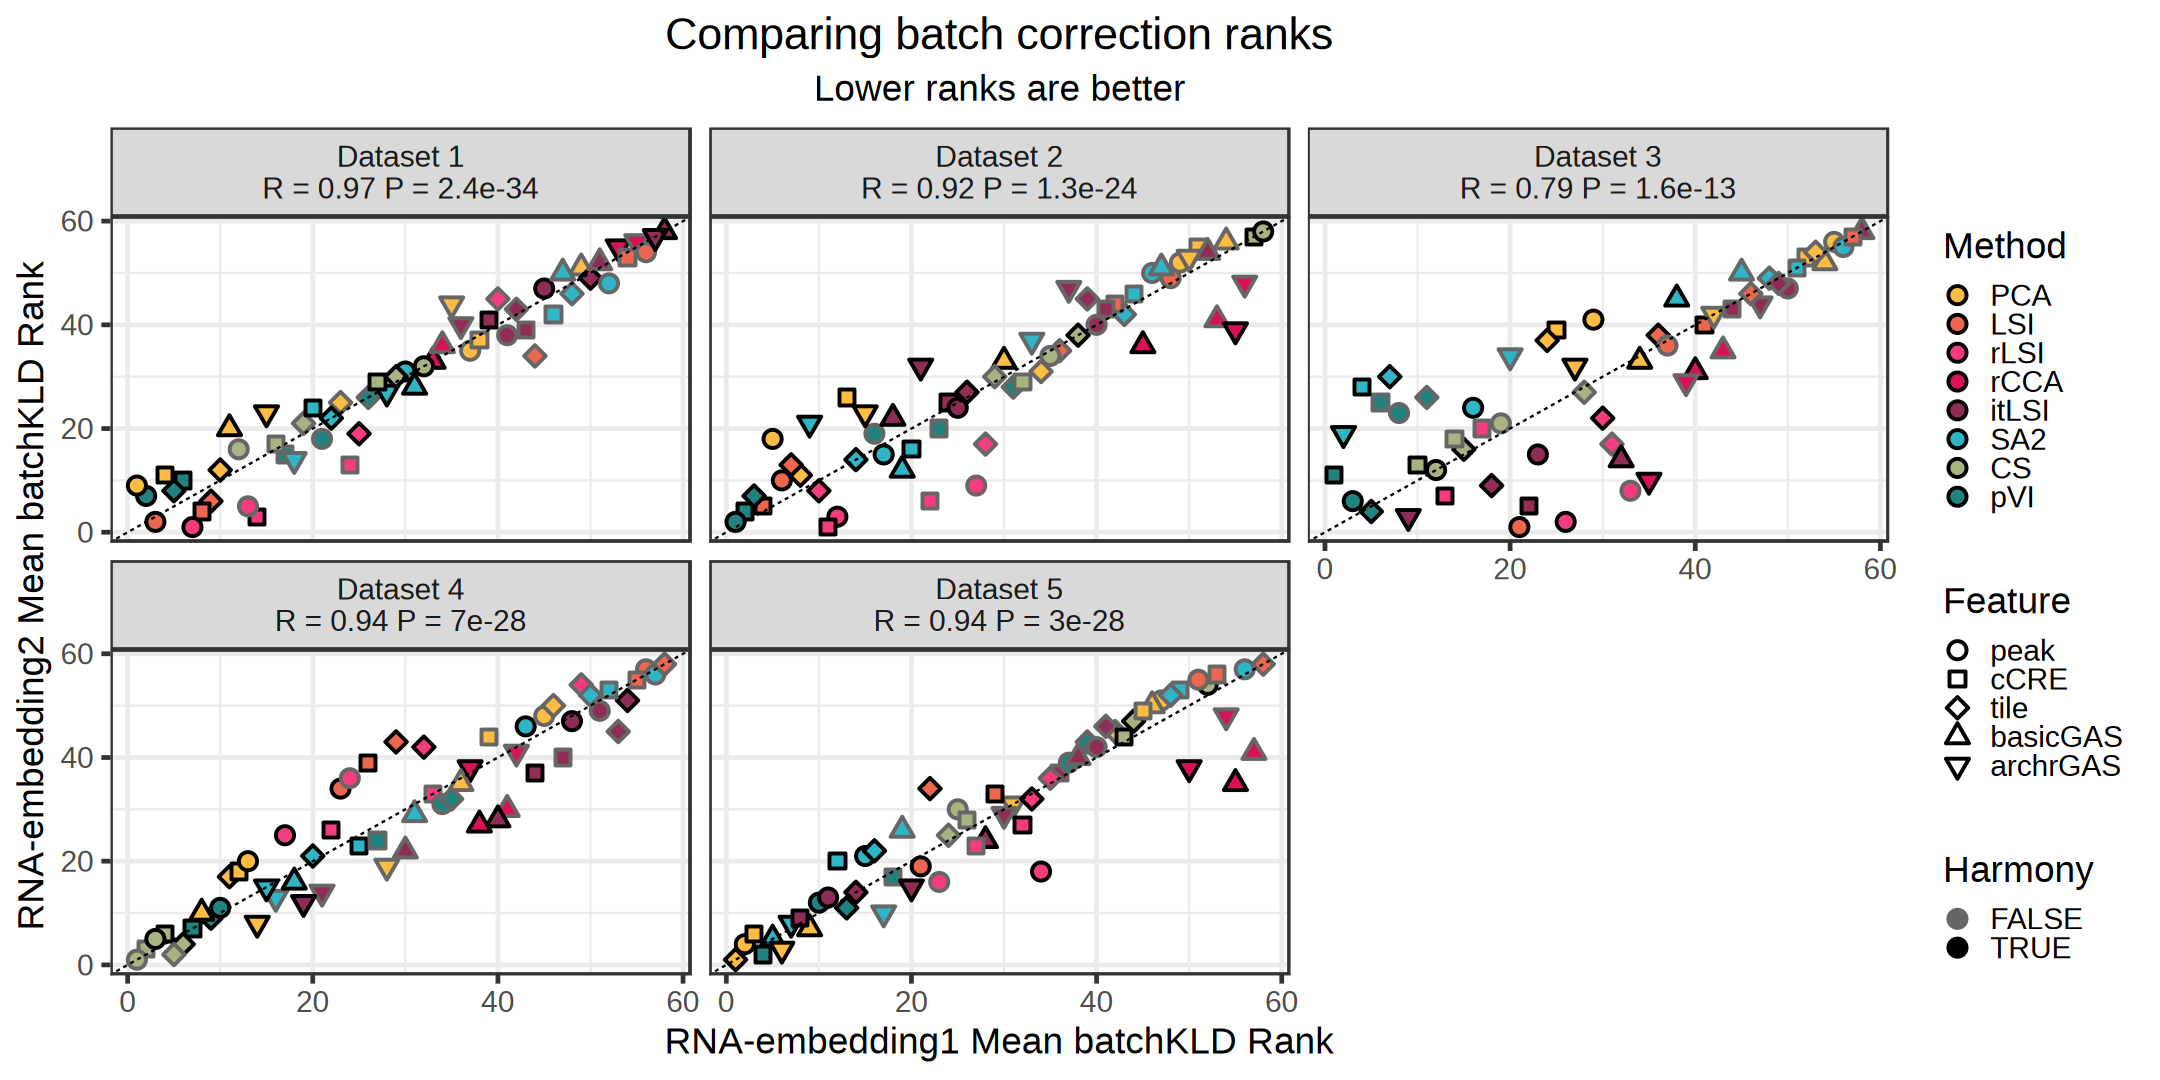

In [51]:
if(!identical(PH200_both_rank[,1:4],ST200_both_rank[,1:4])) stop('pipelines do not match')
if(!identical(colnames(PH200_both_rank),colnames(ST200_both_rank))) stop('colnames do not match')

toPlot <- cbind(PH200_both_rank[,1:3],'Harmony'=ifelse(PH200_both_rank$Harmony=='Harmony',TRUE,FALSE),
                'PH_mKNN_meanRank'=PH200_both_rank$mean_bio_rank,'ST_mKNN_meanRank'=ST200_both_rank$mean_bio_rank,
                'PH_lsKLD_meanRank'=PH200_both_rank$mean_batch_rank,'ST_lsKLD_meanRank'=ST200_both_rank$mean_batch_rank)

bio_corr_vec <- c()
batch_corr_vec <- c()
for(ds in sort(unique(toPlot$dataset))){
    ll <- toPlot[which(toPlot$dataset==ds),]
    bio_corr <- cor.test(ll$PH_mKNN_meanRank,ll$ST_mKNN_meanRank,method='pearson')
    batch_corr <- cor.test(ll$PH_lsKLD_meanRank,ll$ST_lsKLD_meanRank,method='pearson')
    
    bio_corr_vec <- c(bio_corr_vec,paste(sep='',dataset_labeller[ds],'\nR = ',round(bio_corr$estimate,2),
                                                    ' P = ',signif(bio_corr$p.value,2)))
    batch_corr_vec <- c(batch_corr_vec,paste(sep='',dataset_labeller[ds],'\nR = ',round(batch_corr$estimate,2),
                                                    ' P = ',signif(batch_corr$p.value,2)))
}
names(bio_corr_vec) <- sort(unique(toPlot$dataset))
names(batch_corr_vec) <- sort(unique(toPlot$dataset))

toPlot$dataset <- factor(toPlot$dataset,levels=ds_vec)
toPlot$feature <- factor(toPlot$feature,levels=ft_vec)
toPlot$method <- factor(toPlot$method,levels=md_vec)

options(repr.plot.height=9,repr.plot.width=18)
set.seed(0)
g <- ggplot(toPlot[sample(nrow(toPlot),nrow(toPlot)),],
            aes(x=PH_mKNN_meanRank,y=ST_mKNN_meanRank,fill=method,shape=feature,color=Harmony)) + 
        geom_point(size=4,stroke=1.25) + 
        theme_bw(base_size=22) +
        labs(x='RNA-embedding1 Mean bioKNN Rank',y='RNA-embedding2 Mean bioKNN Rank',shape='Feature',fill='Method',
             title='Comparing bio-conservation ranks',subtitle='Lower ranks are better') +
        theme(plot.title=element_text(hjust = 0.5),plot.subtitle=element_text(hjust = 0.5)) +
        scale_fill_manual(values=method_colors) + scale_shape_manual(values=feature_shapes) + 
        scale_color_manual(values=c('TRUE'='black','FALSE'=harmony_color)) + 
        guides(fill = guide_legend(override.aes = list(shape=21))) +
        facet_wrap(~dataset,labeller = labeller(dataset=bio_corr_vec)) +
        geom_abline(slope=1,intercept=0,linetype='dashed')
print(g)

if(!is.na(save_dir)){
    ggsave(file=paste(sep='',save_dir,'bioCompNN_meanRank_facetDataset_scatterPlot',file_extension),
           plot=g,units='in',height=9,width=18,dpi=300)
}

options(repr.plot.height=9,repr.plot.width=18)
set.seed(0)
g <- ggplot(toPlot[sample(nrow(toPlot),nrow(toPlot)),],
            aes(x=PH_lsKLD_meanRank,y=ST_lsKLD_meanRank,fill=method,shape=feature,color=Harmony)) + 
        geom_point(size=4,stroke=1.25) + 
        theme_bw(base_size=22) + 
        labs(x='RNA-embedding1 Mean batchKLD Rank',y='RNA-embedding2 Mean batchKLD Rank',shape='Feature',fill='Method',
             title='Comparing batch correction ranks',subtitle='Lower ranks are better') +
        theme(plot.title=element_text(hjust = 0.5),plot.subtitle=element_text(hjust = 0.5)) +
        scale_fill_manual(values=method_colors) + scale_shape_manual(values=feature_shapes) + 
        scale_color_manual(values=c('TRUE'='black','FALSE'=harmony_color)) + 
        guides(fill = guide_legend(override.aes = list(shape=21))) +
        facet_wrap(~dataset,labeller = labeller(dataset=batch_corr_vec)) +
        geom_abline(slope=1,intercept=0,linetype='dashed')
print(g)

if(!is.na(save_dir)){
    ggsave(file=paste(sep='',save_dir,'batchCompNN_meanRank_facetDataset_scatterPlot',file_extension),
           plot=g,units='in',height=9,width=18,dpi=300)
}

## Session Info

In [52]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /PHShome/kew47/miniconda3/envs/integrateATAC/lib/libopenblasp-r0.3.27.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/New_York
tzcode source: system (glibc)

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] repr_1.1.7         gridExtra_2.3      patchwork_1.2.0    RColorBrewer_1.1-3
 [5] scales_1.3.0       viridis_0.6.5      viridisLite_0.4.2  ggrepel_0.9.5     
 [9] ggrastr_1.0.2      tidyr_1.3